In [ ]:
import numpy as np 
import pandas as pd
from scipy.spatial.distance import euclidean
from sklearn.base import BaseEstimator,ClassifierMixin
from sklearn.model_selection import train_test_split
import fastdtw
#dtw for comparing two sequences and calculating the optimal matchinh between two sequences
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.signal import butter, lfilter, freqz, boxcar
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, euclidean_distances
from scipy.fftpack import fft, ifft
import os

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
train_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_data.csv")
train_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_events.csv")
test_data = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series10_data.csv")
test_data_event = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/test/subj1_series9_data.csv")

In [ ]:
train_complete = pd.concat([train_data,train_data_event], axis=1)
train_complete.insert(0, "order", range(0, len(train_complete)))
train_complete

order                    id  Fp1  ...  LiftOff  Replace  BothReleased
0            0       subj1_series1_0  -31  ...        0        0             0
1            1       subj1_series1_1  -29  ...        0        0             0
2            2       subj1_series1_2 -172  ...        0        0             0
3            3       subj1_series1_3 -272  ...        0        0             0
4            4       subj1_series1_4 -265  ...        0        0             0
...        ...                   ...  ...  ...      ...      ...           ...
119491  119491  subj1_series1_119491  478  ...        0        0             0
119492  119492  subj1_series1_119492  439  ...        0        0             0
119493  119493  subj1_series1_119493  363  ...        0        0             0
119494  119494  subj1_series1_119494  281  ...        0        0             0
119495  119495  subj1_series1_119495  242  ...        0        0             0

[119496 rows x 41 columns]

In [ ]:
df = pd.DataFrame(train_complete)

In [ ]:
new_data = df.drop(['id','Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'T7','T8', 'TP9', 'CP5', 'CP1', 'CP2', 'CP6', 'TP10', 'P7', 'P8', 'PO9','O1','Oz','O2','O2','PO10'], axis = 1)

In [ ]:

new_data

order   C3   Cz  ...  LiftOff  Replace  BothReleased
0            0  192  230  ...        0        0             0
1            1  201  233  ...        0        0             0
2            2  198  207  ...        0        0             0
3            3  212  221  ...        0        0             0
4            4  242  230  ...        0        0             0
...        ...  ...  ...  ...      ...      ...           ...
119491  119491   73  -89  ...        0        0             0
119492  119492   49  -99  ...        0        0             0
119493  119493   35 -134  ...        0        0             0
119494  119494   42 -112  ...        0        0             0
119495  119495   38 -113  ...        0        0             0

[119496 rows x 13 columns]

In [ ]:
C3= train_data.loc[:,"C3"]
C3

0         192
1         201
2         198
3         212
4         242
         ... 
119491     73
119492     49
119493     35
119494     42
119495     38
Name: C3, Length: 119496, dtype: int64

In [ ]:
C4= train_data.loc[:,"C4"]
C4

0         573
1         554
2         542
3         542
4         545
         ... 
119491    233
119492    264
119493    241
119494    232
119495    238
Name: C4, Length: 119496, dtype: int64

In [ ]:
Cz= train_data.loc[:,"Cz"]
C3

0         192
1         201
2         198
3         212
4         242
         ... 
119491     73
119492     49
119493     35
119494     42
119495     38
Name: C3, Length: 119496, dtype: int64

In [ ]:
P3= train_data.loc[:,"P3"]
P3

0         348
1         327
2         319
3         336
4         324
         ... 
119491     85
119492     61
119493     53
119494     50
119495     75
Name: P3, Length: 119496, dtype: int64

In [ ]:
P4= train_data.loc[:,"P4"]
P4

0         105
1          78
2          66
3          71
4          76
         ... 
119491    444
119492    427
119493    438
119494    444
119495    460
Name: P4, Length: 119496, dtype: int64

In [ ]:
Pz= train_data.loc[:,"Pz"]
Pz

0         383
1         369
2         355
3         356
4         346
         ... 
119491     -1
119492     -8
119493    -24
119494    -25
119495     -3
Name: Pz, Length: 119496, dtype: int64

## Handstart

In [ ]:

C3_arr1 = []
C4_arr1 = []
Cz_arr1 = []
P3_arr1 = []
P4_arr1 = []
Pz_arr1 = []
for i in range(1070, 1219):
  #j= C3[i] + 1
  C3_arr1.append(C3[i])
  C4_arr1.append(C4[i])
  Cz_arr1.append(Cz[i])
  P3_arr1.append(P3[i])
  P4_arr1.append(P4[i])
  Pz_arr1.append(Pz[i])
print(C3_arr1)
print(C4_arr1)
print(Cz_arr1)
print(P3_arr1)
print(P4_arr1)
print(Pz_arr1)

[303, 326, 343, 329, 311, 311, 325, 305, 330, 322, 346, 350, 371, 392, 362, 345, 376, 338, 325, 329, 349, 357, 381, 415, 418, 432, 446, 439, 365, 413, 426, 409, 401, 411, 431, 410, 407, 467, 410, 444, 458, 431, 439, 420, 424, 446, 425, 444, 457, 448, 421, 421, 477, 486, 494, 504, 481, 478, 476, 446, 440, 485, 465, 457, 505, 426, 436, 462, 443, 433, 494, 503, 502, 490, 480, 476, 473, 443, 443, 491, 477, 491, 468, 463, 440, 459, 465, 429, 451, 452, 434, 448, 440, 433, 466, 453, 394, 364, 381, 393, 378, 371, 360, 413, 426, 395, 395, 431, 453, 431, 419, 453, 496, 463, 386, 439, 375, 372, 396, 401, 411, 383, 365, 392, 387, 364, 389, 445, 413, 372, 377, 393, 380, 349, 357, 377, 382, 397, 387, 391, 396, 367, 368, 376, 366, 358, 351, 335, 304]
[581, 590, 607, 606, 579, 568, 584, 592, 566, 564, 544, 568, 558, 554, 559, 559, 572, 551, 595, 628, 657, 659, 669, 673, 645, 680, 687, 693, 717, 699, 687, 673, 680, 675, 663, 660, 663, 679, 673, 654, 645, 651, 690, 729, 742, 786, 810, 846, 852, 828, 813

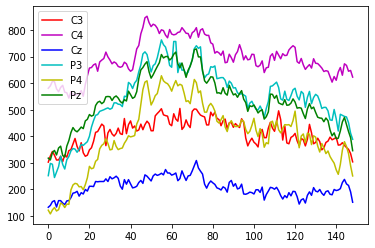

In [ ]:
plt.plot(C3_arr1, color='r', label='C3')
plt.plot(C4_arr1, color='m', label='C4')
plt.plot(Cz_arr1, color='b', label='Cz')
plt.plot(P3_arr1, color='c', label='P3')
plt.plot(P4_arr1, color='y', label='P4')
plt.plot(Pz_arr1, color='g', label='Pz')
plt.legend()
plt.show()

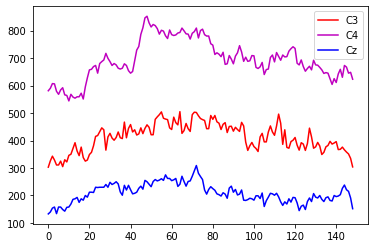

In [ ]:
plt.plot(C3_arr1, color='r', label='C3')
plt.plot(C4_arr1, color='m', label='C4')
plt.plot(Cz_arr1, color='b', label='Cz')
plt.legend()
plt.show()

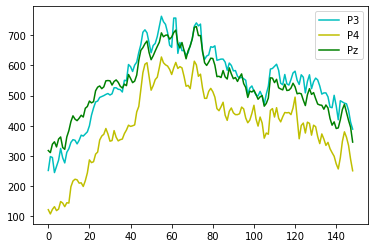

In [ ]:
plt.plot(P3_arr1, color='c', label='P3')
plt.plot(P4_arr1, color='y', label='P4')
plt.plot(Pz_arr1, color='g', label='Pz')
plt.legend()
plt.show()

[303, 326, 343, 329, 311, 311, 325, 305, 330, 322, 346, 350, 371, 392, 362, 345, 376, 338, 325, 329, 349, 357, 381, 415, 418, 432, 446, 439, 365, 413, 426, 409, 401, 411, 431, 410, 407, 467, 410, 444, 458, 431, 439, 420, 424, 446, 425, 444, 457, 448, 421, 421, 477, 486, 494, 504, 481, 478, 476, 446, 440, 485, 465, 457, 505, 426, 436, 462, 443, 433, 494, 503, 502, 490, 480, 476, 473, 443, 443, 491, 477, 491, 468, 463, 440, 459, 465, 429, 451, 452, 434, 448, 440, 433, 466, 453, 394, 364, 381, 393, 378, 371, 360, 413, 426, 395, 395, 431, 453, 431, 419, 453, 496, 463, 386, 439, 375, 372, 396, 401, 411, 383, 365, 392, 387, 364, 389, 445, 413, 372, 377, 393, 380, 349, 357, 377, 382, 397, 387, 391, 396, 367, 368, 376, 366, 358, 351, 335, 304]
[581, 590, 607, 606, 579, 568, 584, 592, 566, 564, 544, 568, 558, 554, 559, 559, 572, 551, 595, 628, 657, 659, 669, 673, 645, 680, 687, 693, 717, 699, 687, 673, 680, 675, 663, 660, 663, 679, 673, 654, 645, 651, 690, 729, 742, 786, 810, 846, 852, 828, 813

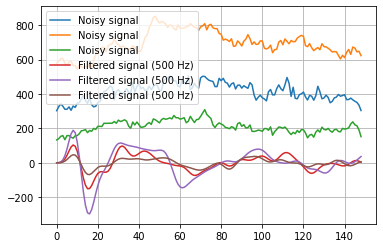

<Figure size 2880x720 with 0 Axes>

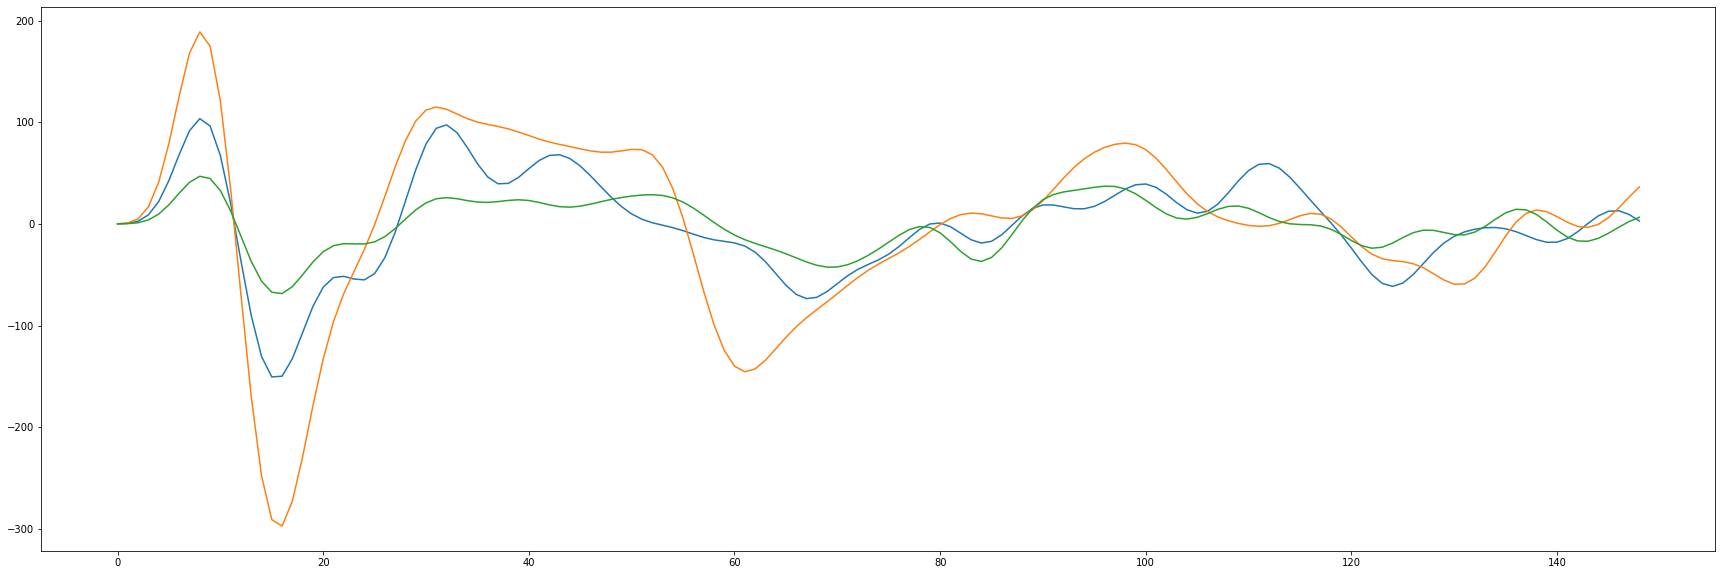

-79.122232460027


In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    
    train = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_data.csv")
    C3 = train.loc[:,"C3"]
    C4= train.loc[:,"C4"]
    Cz= train.loc[:,"Cz"]
    P3= train.loc[:,"P3"]
    P4= train.loc[:,"P4"]
    Pz= train.loc[:,"Pz"]

    C3_arr1 = []
    C4_arr1 = []
    Cz_arr1 = []
    P3_arr1 = []
    P4_arr1 = []
    Pz_arr1 = []
    for i in range(1070, 1219):
    #j= C3[i] + 1
        C3_arr1.append(C3[i])
        C4_arr1.append(C4[i])
        Cz_arr1.append(Cz[i])
        P3_arr1.append(P3[i])
        P4_arr1.append(P4[i])
        Pz_arr1.append(Pz[i])
    print(C3_arr1)
    print(C4_arr1)
    print(Cz_arr1)
    print(P3_arr1)
    print(P4_arr1)
    print(Pz_arr1)
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 500
    lowcut = 7
    highcut = 50

 
    # Filter a noisy signal.
    T = 0.05
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.01
    f0 = 500.0
    
    plt.figure(2)
    plt.clf()
    plt.plot( C3_arr1, label='Noisy signal')
    plt.plot( C4_arr1, label='Noisy signal')
    plt.plot( Cz_arr1, label='Noisy signal')

    y = butter_bandpass_filter(C3_arr1, lowcut, highcut, fs, order=6)
    z = butter_bandpass_filter(C4_arr1, lowcut, highcut, fs, order=6)
    u = butter_bandpass_filter(Cz_arr1, lowcut, highcut, fs, order=6)
    plt.plot( y, label='Filtered signal (%g Hz)' % f0)
    plt.plot(z, label='Filtered signal (%g Hz)' % f0) 
    plt.plot(u, label='Filtered signal (%g Hz)' % f0) 
    #plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')
    plt.figure(figsize=(40, 10))
    #plt.rcParams["figure.figsize"]=(40, 10)
    plt.show()
 
    #resizing
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(10)
    plt.plot(y, label='Filtered signal (%g Hz)' % f0)
    plt.plot(z, label='Filtered signal (%g Hz)' % f0)
    plt.plot(u, label='Filtered signal (%g Hz)' % f0)
    plt.show()

    print(sum(y))


run()

[303, 326, 343, 329, 311, 311, 325, 305, 330, 322, 346, 350, 371, 392, 362, 345, 376, 338, 325, 329, 349, 357, 381, 415, 418, 432, 446, 439, 365, 413, 426, 409, 401, 411, 431, 410, 407, 467, 410, 444, 458, 431, 439, 420, 424, 446, 425, 444, 457, 448, 421, 421, 477, 486, 494, 504, 481, 478, 476, 446, 440, 485, 465, 457, 505, 426, 436, 462, 443, 433, 494, 503, 502, 490, 480, 476, 473, 443, 443, 491, 477, 491, 468, 463, 440, 459, 465, 429, 451, 452, 434, 448, 440, 433, 466, 453, 394, 364, 381, 393, 378, 371, 360, 413, 426, 395, 395, 431, 453, 431, 419, 453, 496, 463, 386, 439, 375, 372, 396, 401, 411, 383, 365, 392, 387, 364, 389, 445, 413, 372, 377, 393, 380, 349, 357, 377, 382, 397, 387, 391, 396, 367, 368, 376, 366, 358, 351, 335, 304]
[581, 590, 607, 606, 579, 568, 584, 592, 566, 564, 544, 568, 558, 554, 559, 559, 572, 551, 595, 628, 657, 659, 669, 673, 645, 680, 687, 693, 717, 699, 687, 673, 680, 675, 663, 660, 663, 679, 673, 654, 645, 651, 690, 729, 742, 786, 810, 846, 852, 828, 813

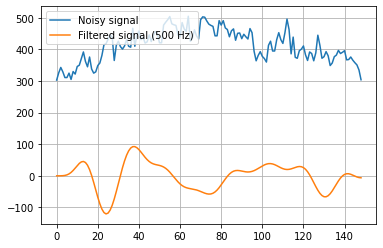

<Figure size 2880x720 with 0 Axes>

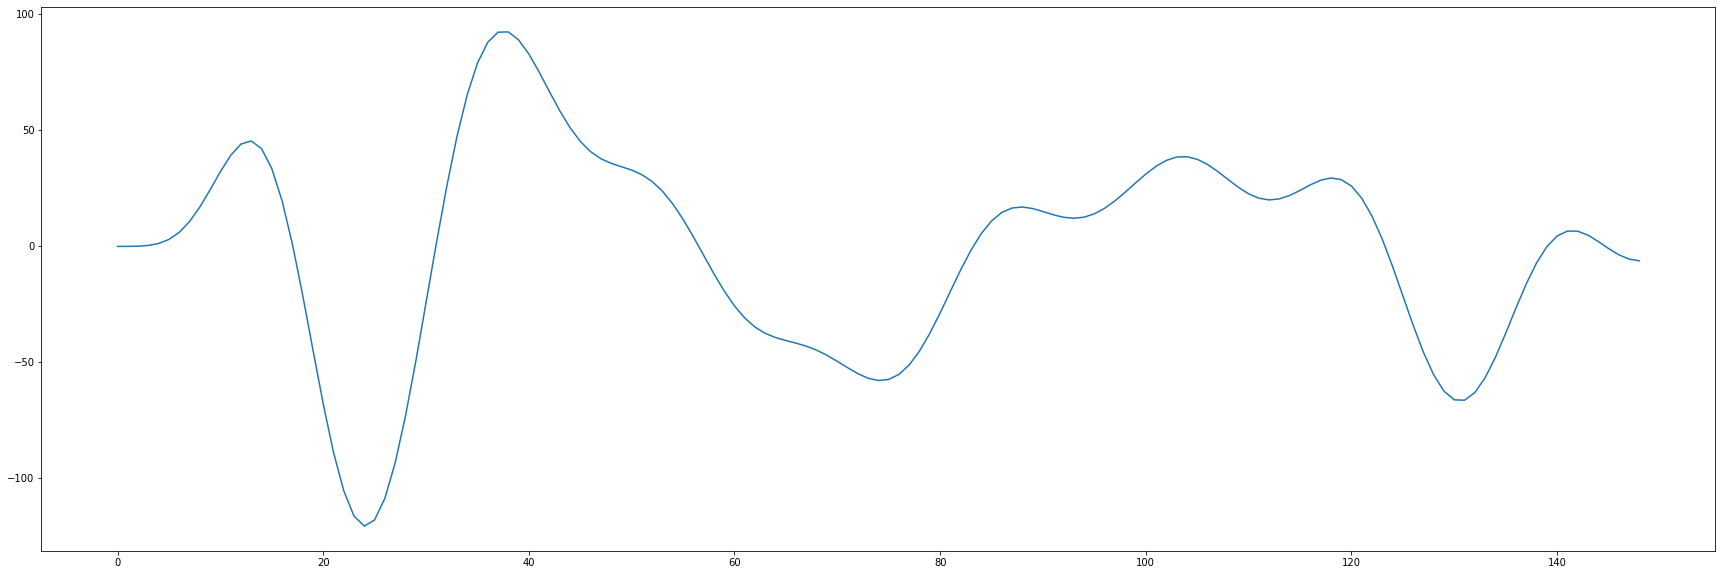

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

train = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_data.csv")
C3 = train.loc[:,"C3"]
C4= train.loc[:,"C4"]
Cz= train.loc[:,"Cz"]
P3= train.loc[:,"P3"]
P4= train.loc[:,"P4"]
Pz= train.loc[:,"Pz"]

C3_arr1 = []
C4_arr1 = []
Cz_arr1 = []
P3_arr1 = []
P4_arr1 = []
Pz_arr1 = []
for i in range(1070, 1219):
#j= C3[i] + 1
    C3_arr1.append(C3[i])
    C4_arr1.append(C4[i])
    Cz_arr1.append(Cz[i])
    P3_arr1.append(P3[i])
    P4_arr1.append(P4[i])
    Pz_arr1.append(Pz[i])
print(C3_arr1)
print(C4_arr1)
print(Cz_arr1)
print(P3_arr1)
print(P4_arr1)
print(Pz_arr1)
# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30


# Filter a noisy signal.
T = 0.03
nsamples = int(T * fs)
t = np.linspace(0, T, nsamples, endpoint=False)
a = 0.05
f0 = 500.0

plt.figure(2)
plt.clf()
plt.plot( C3_arr1, label='Noisy signal')
#plt.plot( C4_arr1, label='Noisy signal')
#plt.plot( Cz_arr1, label='Noisy signal')

y = butter_bandpass_filter(C3_arr1, lowcut, highcut, fs, order=6)
#z = butter_bandpass_filter(C4_arr1, lowcut, highcut, fs, order=6)
#u = butter_bandpass_filter(Cz_arr1, lowcut, highcut, fs, order=6)
plt.plot( y, label='Filtered signal (%g Hz)' % f0)
#plt.plot(z, label='Filtered signal (%g Hz)' % f0) 
#plt.plot(u, label='Filtered signal (%g Hz)' % f0) 
#plt.xlabel('time (seconds)')
plt.hlines([-a, a], 0, T, linestyles='--')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
#plt.rcParams["figure.figsize"]=(40, 10)
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
#plt.plot(z, label='Filtered signal (%g Hz)' % f0)
#plt.plot(u, label='Filtered signal (%g Hz)' % f0)
plt.show()

### FFT

In [ ]:
from scipy.fft import fft, ifft
x = np.array(C3_arr1)
y = fft(x)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


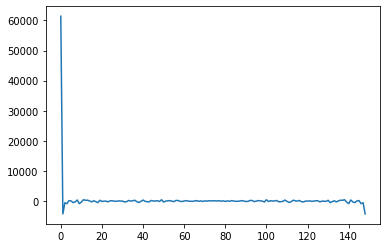

In [ ]:
plt.plot(y)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


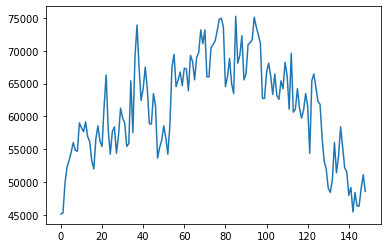

In [ ]:
from scipy.fft import fft, ifft
l = np.array(y)
m = fft(l)

plt.plot(m)

<Figure size 576x432 with 0 Axes>

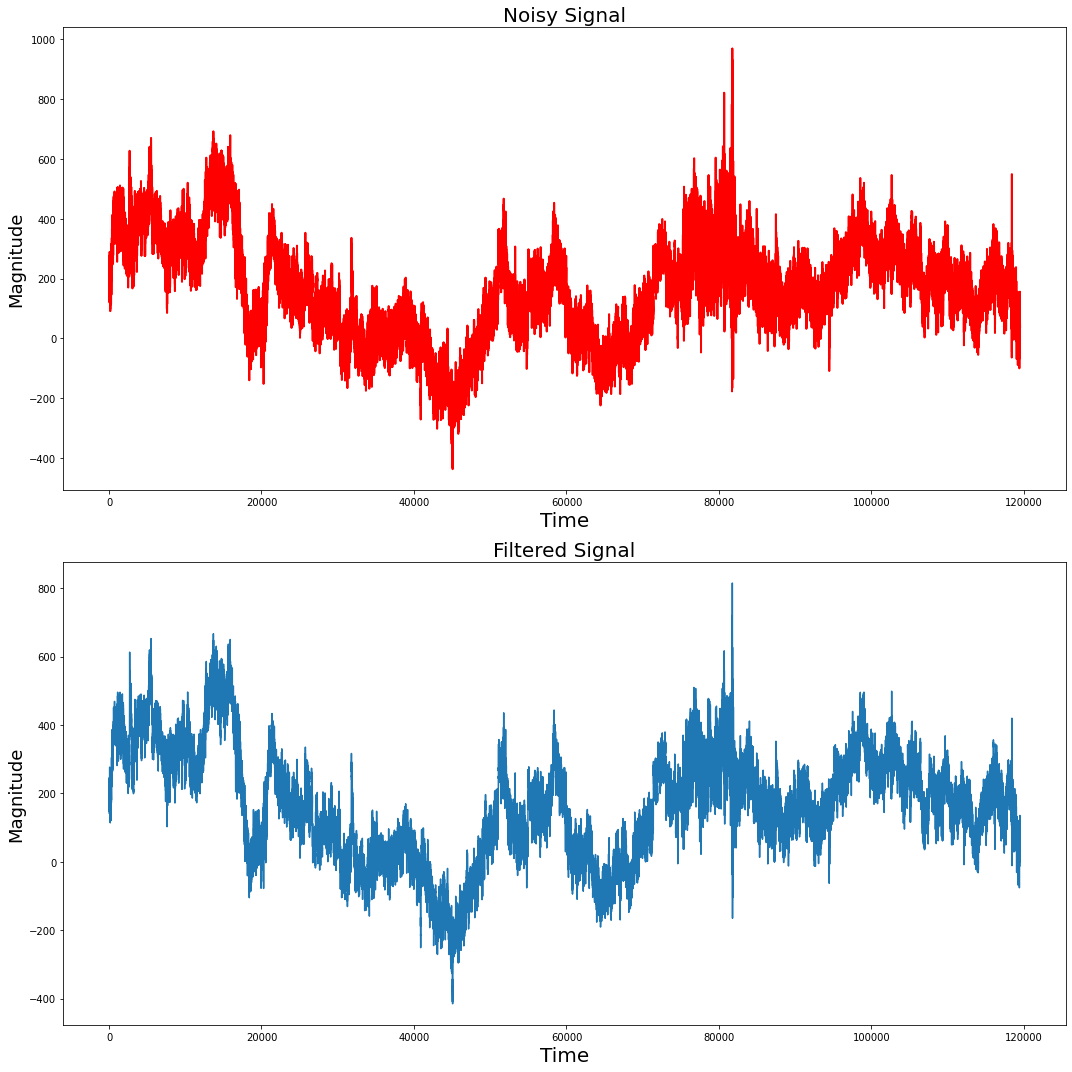

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
  
# Create/view notch filter
samp_freq = 500  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 1.0  # Quality factor
  
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
  
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
  
fig = plt.figure(figsize=(8, 6))
  


# Set time vector
n = np.linspace(0, 1, 100)  # Generate 1000 sample sequence in 1 sec
  

  
# Plotting
fig = plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.plot( C3, color='r', linewidth=2)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Noisy Signal', fontsize=20)
  
# Apply notch filter to the noisy signal using signal.filtfilt
outputSignal = signal.filtfilt(b_notch, a_notch, C3)
  
# Plot notch-filtered version of signal
plt.subplot(212)
  
# Plot output signal of notch filter
plt.plot(outputSignal)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

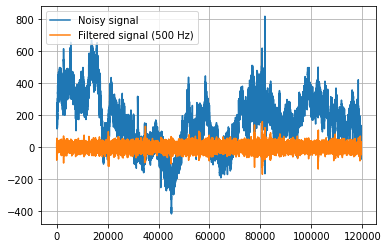

<Figure size 2880x720 with 0 Axes>

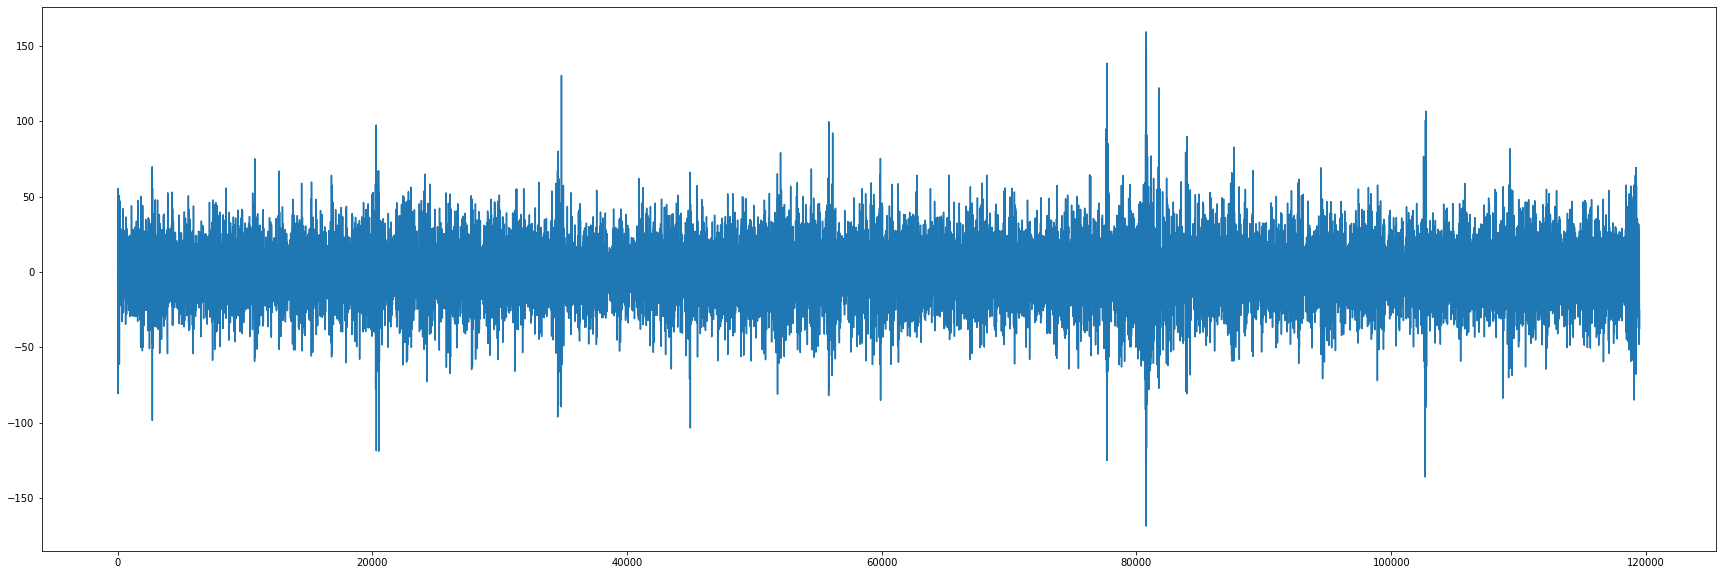

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
plt.figure(2)
plt.clf()
plt.plot( outputSignal, label='Noisy signal')

y = butter_bandpass_filter(outputSignal, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

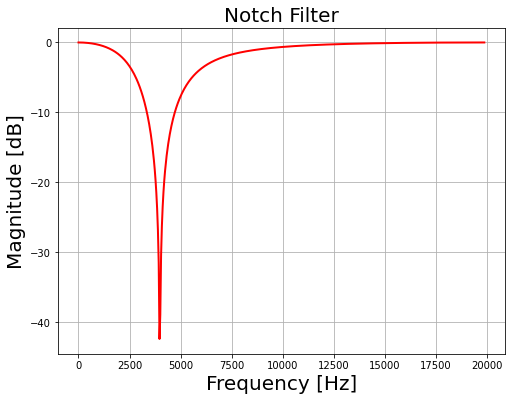

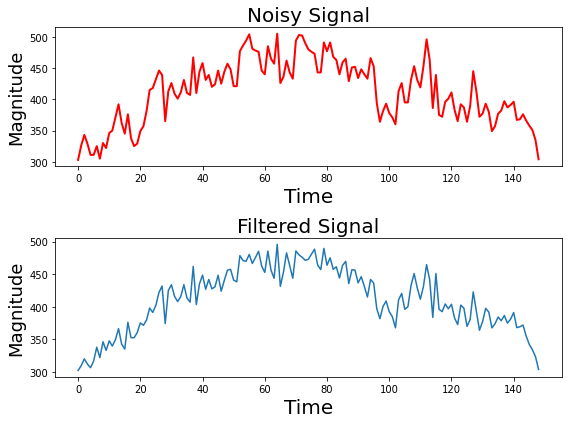

In [ ]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
  
# Create/view notch filter
samp_freq = 500  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 1.0  # Quality factor
  
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
  
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
  
fig = plt.figure(figsize=(8, 6))
  
# Plot magnitude response of the filter
plt.plot(freq*samp_freq/(2*np.pi), 20 * np.log10(abs(h)),
         'r', label='Bandpass filter', linewidth='2')
plt.xlabel('Frequency [Hz]', fontsize=20)
plt.ylabel('Magnitude [dB]', fontsize=20)
plt.title('Notch Filter', fontsize=20)
plt.grid()

  
# Plotting
fig = plt.figure(figsize=(8, 6))
plt.subplot(211)
plt.plot( C3_arr1, color='r', linewidth=2)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Noisy Signal', fontsize=20)
  
# Apply notch filter to the noisy signal using signal.filtfilt
outputSignal = signal.filtfilt(b_notch, a_notch, C3_arr1)
  
# Plot notch-filtered version of signal
plt.subplot(212)
  
# Plot output signal of notch filter
plt.plot(outputSignal)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Magnitude', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

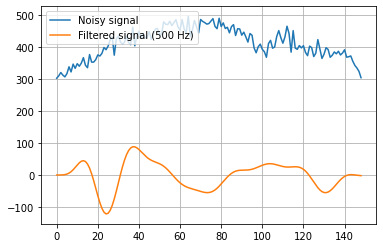

<Figure size 2880x720 with 0 Axes>

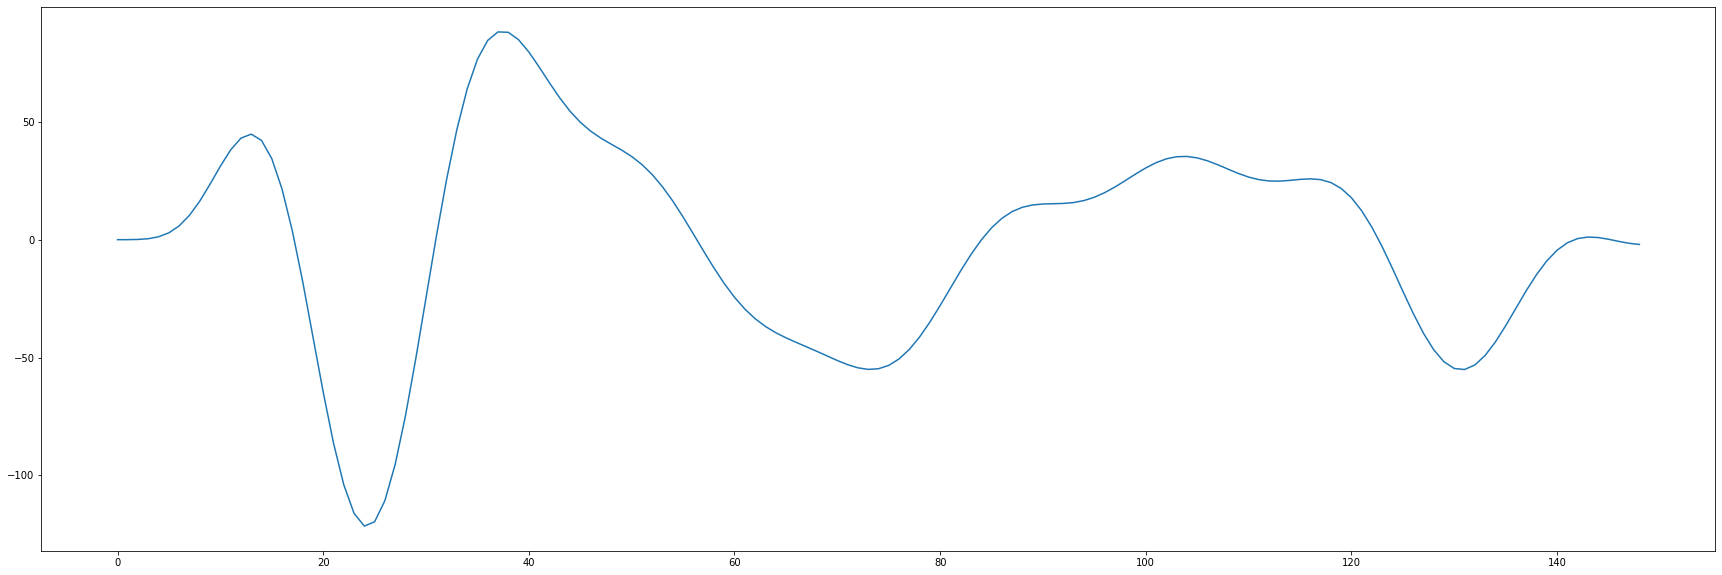

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
plt.figure(2)
plt.clf()
plt.plot( outputSignal, label='Noisy signal')

y = butter_bandpass_filter(outputSignal, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

## First Digit Touch

In [ ]:
C3_arr2 = []
C4_arr2 = []
Cz_arr2 = []
P3_arr2 = []
P4_arr2 = []
Pz_arr2 = []
for i in range(1722, 1871):
  #j= C3[i] + 1
  C3_arr2.append(C3[i])
  C4_arr2.append(C4[i])
  Cz_arr2.append(Cz[i])
  P3_arr2.append(P3[i])
  P4_arr2.append(P4[i])
  Pz_arr2.append(Pz[i])
print(C3_arr2)
print(C4_arr2)
print(Cz_arr2)
print(P3_arr2)
print(P4_arr2)
print(Pz_arr2)

[446, 413, 358, 386, 381, 367, 391, 382, 345, 355, 388, 409, 402, 431, 452, 443, 414, 444, 433, 431, 458, 479, 444, 433, 450, 454, 460, 464, 468, 483, 504, 467, 472, 479, 479, 473, 430, 451, 463, 436, 448, 474, 477, 461, 424, 416, 417, 417, 369, 369, 419, 406, 376, 353, 353, 387, 388, 399, 410, 382, 374, 401, 435, 427, 449, 436, 442, 451, 461, 421, 403, 438, 410, 437, 466, 484, 396, 391, 447, 415, 423, 428, 452, 460, 449, 417, 397, 402, 424, 394, 376, 389, 362, 347, 326, 345, 376, 390, 395, 390, 369, 403, 406, 397, 418, 405, 407, 435, 432, 401, 392, 404, 377, 416, 442, 419, 409, 409, 407, 416, 416, 422, 412, 360, 378, 441, 473, 423, 380, 386, 366, 362, 371, 408, 424, 379, 416, 412, 408, 420, 444, 424, 389, 385, 397, 393, 380, 423, 420]
[658, 667, 703, 686, 612, 640, 652, 627, 663, 668, 672, 686, 682, 715, 759, 736, 741, 747, 683, 685, 655, 668, 719, 749, 750, 733, 717, 729, 724, 737, 716, 698, 726, 726, 728, 730, 700, 700, 712, 716, 719, 741, 743, 723, 724, 722, 720, 709, 720, 705, 691

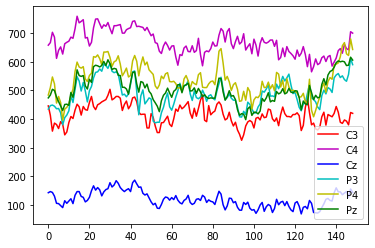

In [ ]:
plt.plot(C3_arr2, color='r', label='C3')
plt.plot(C4_arr2, color='m', label='C4')
plt.plot(Cz_arr2, color='b', label='Cz')
plt.plot(P3_arr2, color='c', label='P3')
plt.plot(P4_arr2, color='y', label='P4')
plt.plot(Pz_arr2, color='g', label='Pz')
plt.legend()
plt.show()


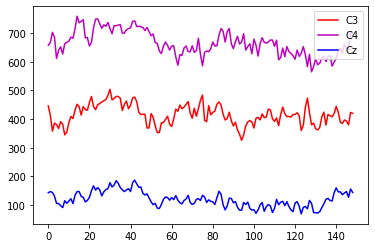

In [ ]:
plt.plot(C3_arr2, color='r', label='C3')
plt.plot(C4_arr2, color='m', label='C4')
plt.plot(Cz_arr2, color='b', label='Cz')
plt.legend()
plt.show()

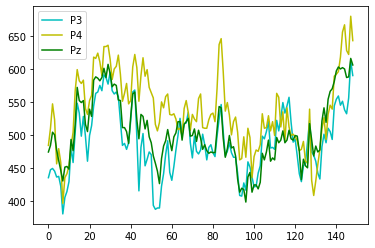

In [ ]:
plt.plot(P3_arr2, color='c', label='P3')
plt.plot(P4_arr2, color='y', label='P4')
plt.plot(Pz_arr2, color='g', label='Pz')
plt.legend()
plt.show()

[303, 326, 343, 329, 311, 311, 325, 305, 330, 322, 346, 350, 371, 392, 362, 345, 376, 338, 325, 329, 349, 357, 381, 415, 418, 432, 446, 439, 365, 413, 426, 409, 401, 411, 431, 410, 407, 467, 410, 444, 458, 431, 439, 420, 424, 446, 425, 444, 457, 448, 421, 421, 477, 486, 494, 504, 481, 478, 476, 446, 440, 485, 465, 457, 505, 426, 436, 462, 443, 433, 494, 503, 502, 490, 480, 476, 473, 443, 443, 491, 477, 491, 468, 463, 440, 459, 465, 429, 451, 452, 434, 448, 440, 433, 466, 453, 394, 364, 381, 393, 378, 371, 360, 413, 426, 395, 395, 431, 453, 431, 419, 453, 496, 463, 386, 439, 375, 372, 396, 401, 411, 383, 365, 392, 387, 364, 389, 445, 413, 372, 377, 393, 380, 349, 357, 377, 382, 397, 387, 391, 396, 367, 368, 376, 366, 358, 351, 335, 304]
[581, 590, 607, 606, 579, 568, 584, 592, 566, 564, 544, 568, 558, 554, 559, 559, 572, 551, 595, 628, 657, 659, 669, 673, 645, 680, 687, 693, 717, 699, 687, 673, 680, 675, 663, 660, 663, 679, 673, 654, 645, 651, 690, 729, 742, 786, 810, 846, 852, 828, 813

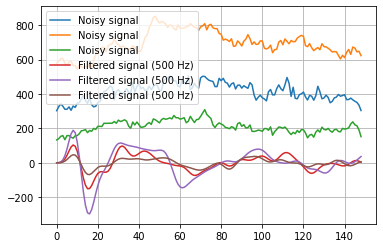

<Figure size 2880x720 with 0 Axes>

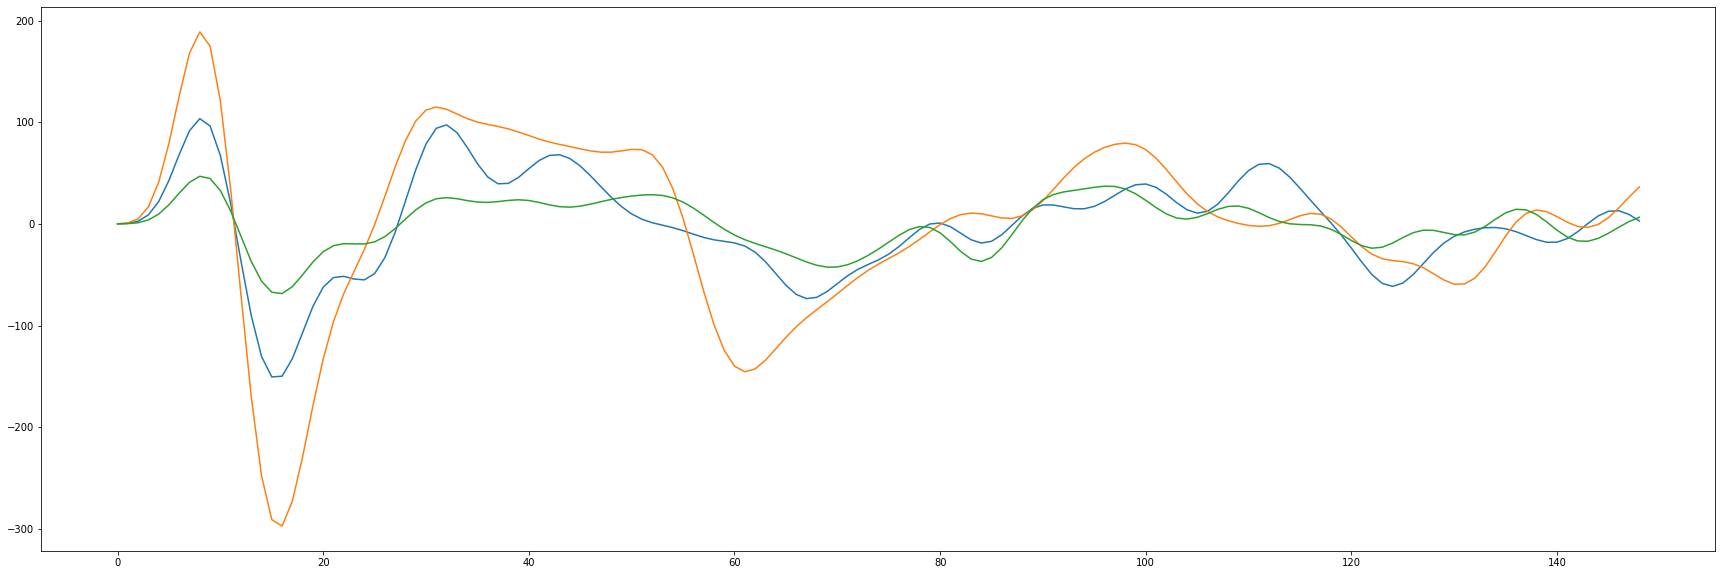

-79.122232460027


In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz
    
    train = pd.read_csv("/content/gdrive/MyDrive/EEG_Signal_Based_UpperLimb_Motion_Recognition&Control/Datasets/Kaggle-Hand lift and grasp/train/subj1_series1_data.csv")
    C3 = train.loc[:,"C3"]
    C4= train.loc[:,"C4"]
    Cz= train.loc[:,"Cz"]
    P3= train.loc[:,"P3"]
    P4= train.loc[:,"P4"]
    Pz= train.loc[:,"Pz"]

    C3_arr1 = []
    C4_arr1 = []
    Cz_arr1 = []
    P3_arr1 = []
    P4_arr1 = []
    Pz_arr1 = []
    for i in range(1070, 1219):
    #j= C3[i] + 1
        C3_arr1.append(C3[i])
        C4_arr1.append(C4[i])
        Cz_arr1.append(Cz[i])
        P3_arr1.append(P3[i])
        P4_arr1.append(P4[i])
        Pz_arr1.append(Pz[i])
    print(C3_arr1)
    print(C4_arr1)
    print(Cz_arr1)
    print(P3_arr1)
    print(P4_arr1)
    print(Pz_arr1)
    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 500
    lowcut = 7
    highcut = 30

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    nsamples = int(T * fs)
    t = np.linspace(0, T, nsamples, endpoint=False)
    a = 0.02
    f0 = 500.0
    
    plt.figure(2)
    plt.clf()
    plt.plot( C3_arr1, label='Noisy signal')
    plt.plot( C4_arr1, label='Noisy signal')
    plt.plot( Cz_arr1, label='Noisy signal')

    y = butter_bandpass_filter(C3_arr1, lowcut, highcut, fs, order=6)
    z = butter_bandpass_filter(C4_arr1, lowcut, highcut, fs, order=6)
    u = butter_bandpass_filter(Cz_arr1, lowcut, highcut, fs, order=6)
    plt.plot( y, label='Filtered signal (%g Hz)' % f0)
    plt.plot(z, label='Filtered signal (%g Hz)' % f0) 
    plt.plot(u, label='Filtered signal (%g Hz)' % f0) 
    #plt.xlabel('time (seconds)')
    plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')
    #plt.figure(figsize=(40, 10))
    #plt.rcParams["figure.figsize"]=(40, 10)
    plt.show()
 
    #resizing
    f = plt.figure()
    f.set_figwidth(30)
    f.set_figheight(10)
    plt.plot(y, label='Filtered signal (%g Hz)' % f0)
    plt.plot(z, label='Filtered signal (%g Hz)' % f0)
    plt.plot(u, label='Filtered signal (%g Hz)' % f0)
    plt.show()

    print(sum(y))


run()

### Both Start Load

In [ ]:

C3_arr3 = []
C4_arr3 = []
Cz_arr3 = []
P3_arr3 = []
P4_arr3 = []
Pz_arr3 = []
for i in range(1768, 1917):
  #j= C3[i] + 1
  C3_arr3.append(C3[i])
  C4_arr3.append(C4[i])
  Cz_arr3.append(Cz[i])
  P3_arr3.append(P3[i])
  P4_arr3.append(P4[i])
  Pz_arr3.append(Pz[i])
print(C3_arr3)
print(C4_arr3)
print(Cz_arr3)
print(P3_arr3)
print(P4_arr3)
print(Pz_arr3)

[417, 417, 369, 369, 419, 406, 376, 353, 353, 387, 388, 399, 410, 382, 374, 401, 435, 427, 449, 436, 442, 451, 461, 421, 403, 438, 410, 437, 466, 484, 396, 391, 447, 415, 423, 428, 452, 460, 449, 417, 397, 402, 424, 394, 376, 389, 362, 347, 326, 345, 376, 390, 395, 390, 369, 403, 406, 397, 418, 405, 407, 435, 432, 401, 392, 404, 377, 416, 442, 419, 409, 409, 407, 416, 416, 422, 412, 360, 378, 441, 473, 423, 380, 386, 366, 362, 371, 408, 424, 379, 416, 412, 408, 420, 444, 424, 389, 385, 397, 393, 380, 423, 420, 464, 501, 456, 454, 438, 448, 428, 413, 458, 448, 473, 456, 428, 431, 411, 423, 421, 399, 409, 416, 393, 391, 364, 355, 343, 358, 317, 313, 292, 312, 278, 258, 292, 314, 331, 304, 298, 295, 256, 244, 285, 293, 283, 321, 312, 333]
[720, 709, 720, 705, 691, 697, 667, 664, 637, 629, 655, 669, 657, 641, 655, 656, 617, 588, 625, 622, 648, 655, 636, 635, 656, 633, 639, 682, 625, 586, 633, 638, 635, 646, 669, 655, 656, 693, 716, 707, 669, 705, 716, 663, 646, 670, 689, 662, 669, 698, 641

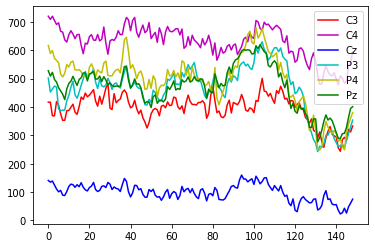

In [ ]:
plt.plot(C3_arr3, color='r', label='C3')
plt.plot(C4_arr3, color='m', label='C4')
plt.plot(Cz_arr3, color='b', label='Cz')
plt.plot(P3_arr3, color='c', label='P3')
plt.plot(P4_arr3, color='y', label='P4')
plt.plot(Pz_arr3, color='g', label='Pz')
plt.legend()
plt.show()

### Liftoff

In [ ]:
C3_arr4 = []
C4_arr4 = []
Cz_arr4 = []
P3_arr4 = []
P4_arr4 = []
Pz_arr4 = []
for i in range(1922, 2071):
  #j= C3[i] + 1
  C3_arr4.append(C3[i])
  C4_arr4.append(C4[i])
  Cz_arr4.append(Cz[i])
  P3_arr4.append(P3[i])
  P4_arr4.append(P4[i])
  Pz_arr4.append(Pz[i])
print(C3_arr4)
print(C4_arr4)
print(Cz_arr4)
print(P3_arr4)
print(P4_arr4)
print(Pz_arr4)

[384, 335, 344, 377, 395, 361, 383, 395, 374, 356, 406, 408, 390, 419, 388, 398, 359, 372, 422, 398, 395, 424, 378, 357, 405, 413, 438, 443, 417, 406, 406, 378, 379, 420, 399, 402, 421, 408, 403, 388, 392, 389, 390, 367, 351, 328, 317, 321, 353, 366, 381, 351, 335, 346, 382, 403, 394, 369, 411, 407, 367, 355, 336, 323, 373, 351, 312, 347, 374, 379, 295, 346, 361, 369, 359, 358, 352, 342, 297, 348, 339, 355, 364, 353, 352, 365, 349, 386, 389, 385, 400, 385, 356, 371, 411, 405, 400, 412, 398, 326, 327, 299, 314, 327, 347, 364, 395, 355, 320, 359, 399, 358, 276, 328, 332, 313, 294, 302, 310, 312, 317, 333, 302, 304, 298, 292, 303, 303, 332, 344, 347, 333, 305, 341, 312, 296, 319, 306, 264, 315, 325, 287, 318, 314, 270, 307, 336, 315, 273]
[563, 572, 583, 572, 595, 620, 614, 581, 585, 600, 624, 642, 643, 634, 621, 650, 663, 637, 608, 576, 582, 605, 650, 616, 597, 632, 639, 647, 641, 649, 647, 651, 623, 648, 625, 611, 635, 638, 620, 621, 624, 615, 663, 695, 625, 574, 567, 595, 617, 627, 592

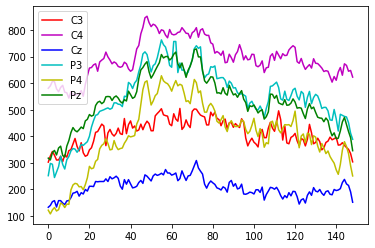

In [ ]:
plt.plot(C3_arr1, color='r', label='C3')
plt.plot(C4_arr1, color='m', label='C4')
plt.plot(Cz_arr1, color='b', label='Cz')
plt.plot(P3_arr1, color='c', label='P3')
plt.plot(P4_arr1, color='y', label='P4')
plt.plot(Pz_arr1, color='g', label='Pz')
plt.legend()
plt.show()

### Replace

In [ ]:
C3_arr5 = []
C4_arr5 = []
Cz_arr5 = []
P3_arr5 = []
P4_arr5 = []
Pz_arr5 = []
for i in range(3534, 3683):
  #j= C3[i] + 1
  C3_arr5.append(C3[i])
  C4_arr5.append(C4[i])
  Cz_arr5.append(Cz[i])
  P3_arr5.append(P3[i])
  P4_arr5.append(P4[i])
  Pz_arr5.append(Pz[i])
print(C3_arr5)
print(C4_arr5)
print(Cz_arr5)
print(P3_arr5)
print(P4_arr5)
print(Pz_arr5)

[320, 349, 328, 306, 317, 331, 275, 274, 324, 325, 371, 389, 403, 382, 339, 325, 340, 335, 375, 393, 368, 333, 331, 323, 335, 300, 360, 379, 356, 362, 366, 354, 376, 385, 421, 441, 437, 430, 401, 339, 342, 321, 310, 310, 326, 370, 370, 343, 321, 310, 360, 378, 378, 362, 349, 373, 366, 358, 360, 376, 361, 362, 379, 360, 353, 363, 357, 337, 384, 419, 423, 438, 398, 457, 404, 431, 445, 422, 388, 357, 361, 390, 378, 369, 375, 386, 352, 371, 350, 353, 339, 354, 317, 359, 380, 328, 351, 364, 370, 388, 309, 340, 380, 391, 386, 384, 393, 365, 371, 346, 370, 353, 316, 295, 298, 311, 321, 324, 346, 324, 295, 304, 307, 294, 303, 282, 255, 262, 265, 222, 236, 266, 267, 259, 260, 265, 277, 289, 272, 291, 304, 304, 359, 321, 304, 297, 298, 326, 325]
[537, 549, 592, 575, 606, 642, 607, 550, 591, 590, 638, 639, 630, 637, 630, 625, 637, 650, 620, 606, 655, 625, 587, 596, 606, 593, 593, 618, 601, 598, 610, 618, 584, 603, 596, 575, 599, 647, 629, 644, 646, 634, 641, 643, 635, 660, 625, 625, 594, 604, 615

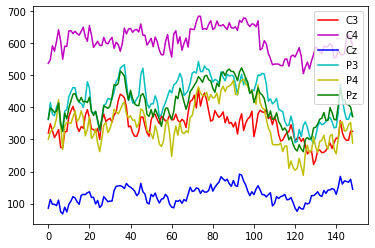

In [ ]:
plt.plot(C3_arr5, color='r', label='C3')
plt.plot(C4_arr5, color='m', label='C4')
plt.plot(Cz_arr5, color='b', label='Cz')
plt.plot(P3_arr5, color='c', label='P3')
plt.plot(P4_arr5, color='y', label='P4')
plt.plot(Pz_arr5, color='g', label='Pz')
plt.legend()
plt.show()

### Both Released

In [ ]:
C3_arr6 = []
C4_arr6 = []
Cz_arr6 = []
P3_arr6 = []
P4_arr6 = []
Pz_arr6 = []
for i in range(3661, 3810):
  #j= C3[i] + 1
  C3_arr6.append(C3[i])
  C4_arr6.append(C4[i])
  Cz_arr6.append(Cz[i])
  P3_arr6.append(P3[i])
  P4_arr6.append(P4[i])
  Pz_arr6.append(Pz[i])
print(C3_arr6)
print(C4_arr6)
print(Cz_arr6)
print(P3_arr6)
print(P4_arr6)
print(Pz_arr6)

[262, 265, 222, 236, 266, 267, 259, 260, 265, 277, 289, 272, 291, 304, 304, 359, 321, 304, 297, 298, 326, 325, 286, 276, 313, 333, 356, 355, 363, 343, 380, 351, 347, 318, 353, 372, 374, 357, 364, 367, 363, 387, 409, 415, 399, 400, 382, 391, 418, 365, 363, 385, 389, 424, 420, 434, 455, 471, 461, 483, 473, 484, 445, 412, 434, 429, 437, 421, 400, 401, 398, 407, 394, 369, 369, 396, 373, 362, 362, 395, 379, 379, 413, 391, 379, 365, 372, 371, 384, 393, 369, 352, 373, 349, 365, 399, 378, 385, 390, 396, 384, 373, 372, 369, 393, 440, 401, 401, 419, 418, 401, 450, 418, 408, 443, 431, 436, 402, 414, 432, 434, 455, 429, 433, 434, 430, 411, 390, 398, 391, 383, 433, 406, 389, 410, 382, 396, 341, 320, 355, 370, 432, 429, 372, 382, 376, 374, 384, 387]
[520, 545, 565, 588, 584, 572, 567, 591, 588, 590, 599, 592, 554, 556, 581, 565, 563, 568, 616, 625, 614, 594, 563, 569, 580, 574, 586, 609, 605, 642, 610, 590, 649, 656, 656, 636, 628, 642, 663, 661, 642, 661, 661, 654, 663, 650, 631, 634, 639, 641, 669

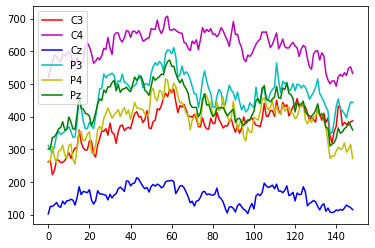

In [ ]:
plt.plot(C3_arr6, color='r', label='C3')
plt.plot(C4_arr6, color='m', label='C4')
plt.plot(Cz_arr6, color='b', label='Cz')
plt.plot(P3_arr6, color='c', label='P3')
plt.plot(P4_arr6, color='y', label='P4')
plt.plot(Pz_arr6, color='g', label='Pz')
plt.legend()
plt.show()

In [ ]:
new_data

order   C3   Cz  ...  LiftOff  Replace  BothReleased
0            0  192  230  ...        0        0             0
1            1  201  233  ...        0        0             0
2            2  198  207  ...        0        0             0
3            3  212  221  ...        0        0             0
4            4  242  230  ...        0        0             0
...        ...  ...  ...  ...      ...      ...           ...
119491  119491   73  -89  ...        0        0             0
119492  119492   49  -99  ...        0        0             0
119493  119493   35 -134  ...        0        0             0
119494  119494   42 -112  ...        0        0             0
119495  119495   38 -113  ...        0        0             0

[119496 rows x 13 columns]

## Handstart_Whole C3 array

In [ ]:
HS = new_data.loc[:,"HandStart"]
HS

0         0
1         0
2         0
3         0
4         0
         ..
119491    0
119492    0
119493    0
119494    0
119495    0
Name: HandStart, Length: 119496, dtype: int64

In [ ]:
C3_arrh = []
for i in range(119495):
  if HS[i] == 1:
    C3_arrh.append(C3[i])
 
print(C3_arrh)

[313, 290, 303, 326, 343, 329, 311, 311, 325, 305, 330, 322, 346, 350, 371, 392, 362, 345, 376, 338, 325, 329, 349, 357, 381, 415, 418, 432, 446, 439, 365, 413, 426, 409, 401, 411, 431, 410, 407, 467, 410, 444, 458, 431, 439, 420, 424, 446, 425, 444, 457, 448, 421, 421, 477, 486, 494, 504, 481, 478, 476, 446, 440, 485, 465, 457, 505, 426, 436, 462, 443, 433, 494, 503, 502, 490, 480, 476, 473, 443, 443, 491, 477, 491, 468, 463, 440, 459, 465, 429, 451, 452, 434, 448, 440, 433, 466, 453, 394, 364, 381, 393, 378, 371, 360, 413, 426, 395, 395, 431, 453, 431, 419, 453, 496, 463, 386, 439, 375, 372, 396, 401, 411, 383, 365, 392, 387, 364, 389, 445, 413, 372, 377, 393, 380, 349, 357, 377, 382, 397, 387, 391, 396, 367, 368, 376, 366, 358, 351, 335, 364, 396, 356, 384, 410, 388, 395, 366, 323, 314, 314, 313, 353, 335, 354, 372, 375, 387, 390, 403, 361, 341, 351, 369, 346, 325, 325, 316, 370, 346, 357, 349, 359, 381, 368, 375, 397, 408, 312, 276, 317, 318, 367, 391, 430, 403, 399, 396, 371, 382,

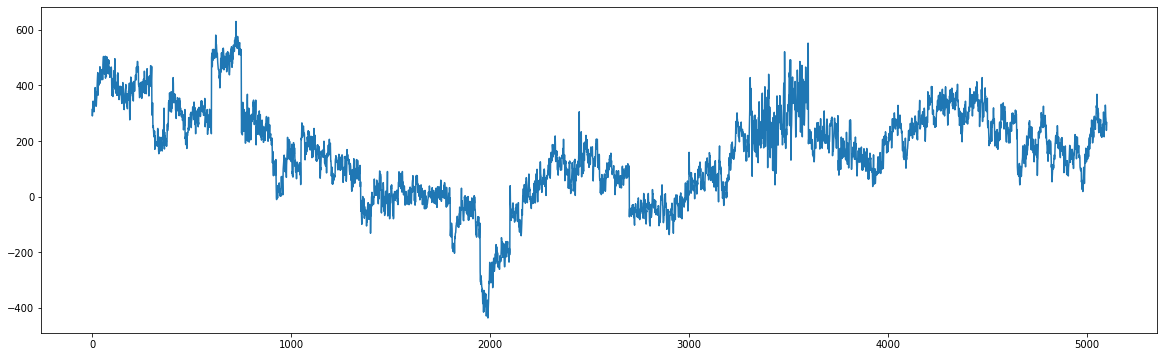

In [ ]:
fig = plt.figure(figsize=(20, 6))
plt.plot(C3_arrh)

<Figure size 1440x432 with 0 Axes>

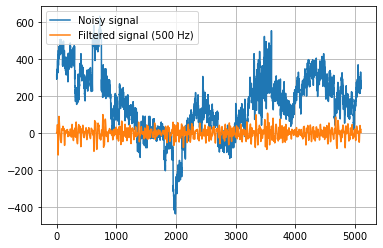

<Figure size 2880x720 with 0 Axes>

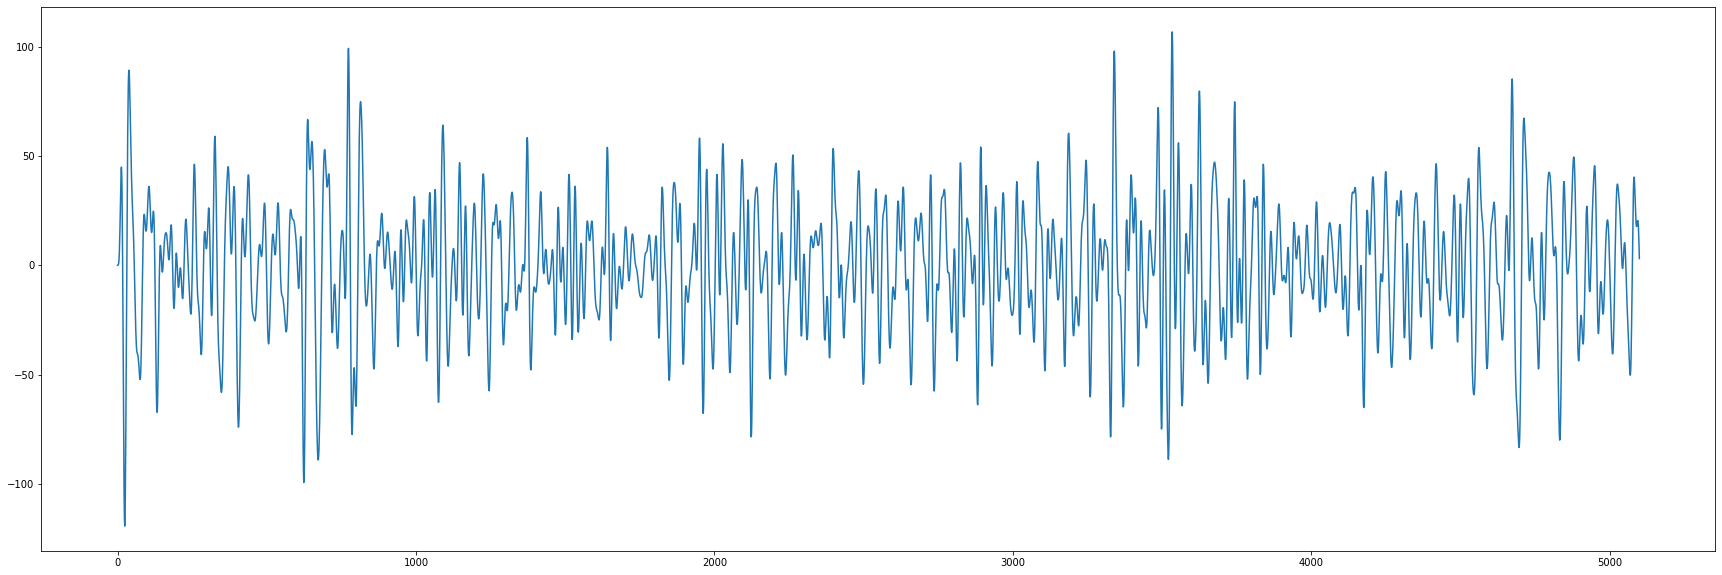

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C3_arrh, label='Noisy signal')

y = butter_bandpass_filter(C3_arrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

# #Notch filter And Band pass(butterworth)

<Figure size 576x432 with 0 Axes>

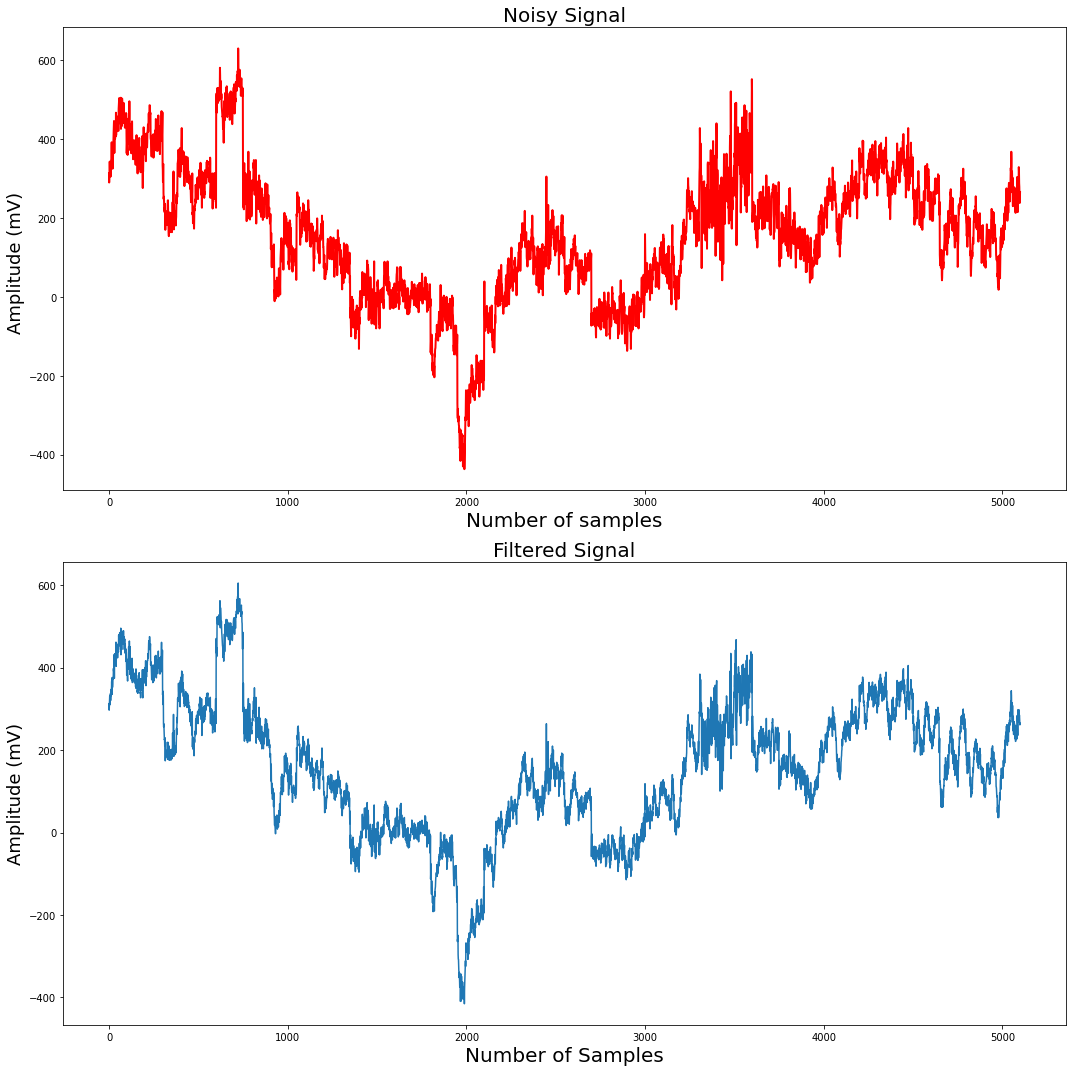

In [ ]:
# Create/view notch filter
samp_freq = 500  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 1.0  # Quality factor
  
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
  
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
  
fig = plt.figure(figsize=(8, 6))
  
# Set time vector
n = np.linspace(0, 1, 100)  # Generate 1000 sample sequence in 1 sec
   
# Plotting
fig = plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.plot( C3_arrh, color='r', linewidth=2)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('Amplitude (mV) ', fontsize=18)
plt.title('Noisy Signal', fontsize=20)
  
# Apply notch filter to the noisy signal using signal.filtfilt
output_C3arrh = signal.filtfilt(b_notch, a_notch, C3_arrh)
  
# Plot notch-filtered version of signal
plt.subplot(212)
  
# Plot output signal of notch filter
plt.plot(output_C3arrh)
plt.xlabel('Number of Samples', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

<Figure size 1440x432 with 0 Axes>

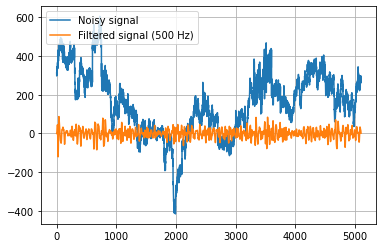

<Figure size 2880x720 with 0 Axes>

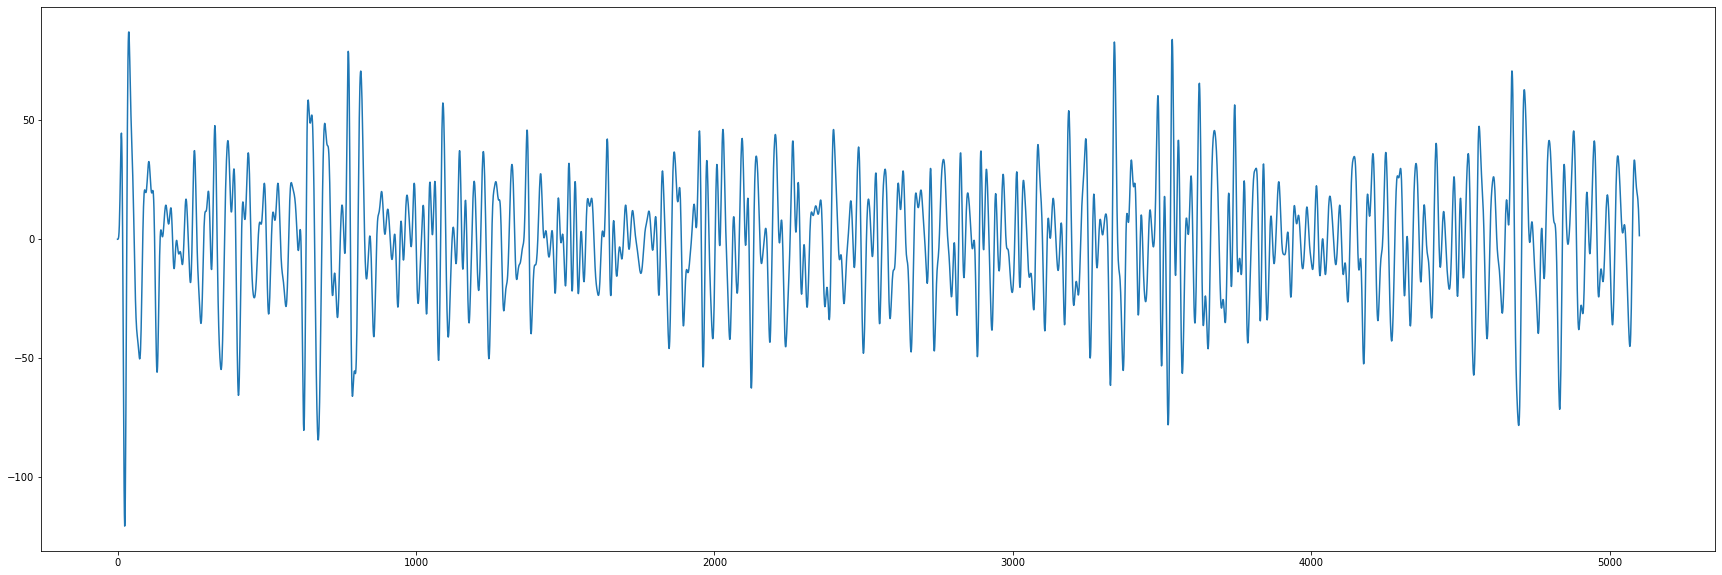

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( output_C3arrh, label='Noisy signal')

y = butter_bandpass_filter(output_C3arrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

## DWT

In [ ]:
import pywt
w = pywt.Wavelet('sym5')
coeffs = pywt.wavedec(C3_arrh, w, level=6)

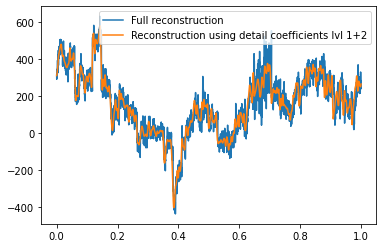

In [ ]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
#reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
#reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 1+2', 'Reconstruction using lvl 1 approximation only'])

## Time Domain Feature extraction of C3 

5100


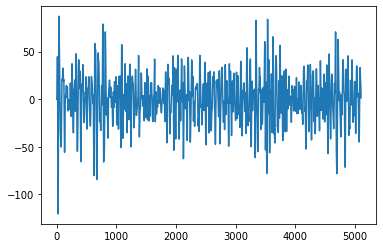

In [ ]:
print(len(y))
plt.plot(y)

In [ ]:
y = np.array(y)
import statistics

median = np.median(y)
mean = y.mean()
var = statistics.variance(y)
std_dev = var ** 0.5

print("variance = ", var)
print("median = ",median)
print("mean = ", mean)
print("Standard Deviation = ", std_dev)

variance =  629.6506276316147
median =  0.9572618209000978
mean =  0.02912711676914836
Standard Deviation =  25.092840166701233


In [ ]:
print(len(y))

5100


## Freq. Domain Feature

In [ ]:
np.random.seed(42)
x = np.random.rand(3000)
ent.spectral_entropy(y, sf=500, method='welch')

###C4

In [ ]:
C4_arrh = []
for i in range(119495):
  if HS[i] == 1:
    C4_arrh.append(C4[i])
 
print(C4_arrh)

[598, 594, 581, 590, 607, 606, 579, 568, 584, 592, 566, 564, 544, 568, 558, 554, 559, 559, 572, 551, 595, 628, 657, 659, 669, 673, 645, 680, 687, 693, 717, 699, 687, 673, 680, 675, 663, 660, 663, 679, 673, 654, 645, 651, 690, 729, 742, 786, 810, 846, 852, 828, 813, 822, 818, 807, 787, 801, 798, 781, 771, 802, 785, 782, 784, 791, 793, 809, 799, 788, 787, 769, 790, 796, 809, 773, 800, 805, 785, 780, 780, 752, 747, 713, 719, 714, 705, 721, 677, 679, 709, 696, 679, 707, 719, 745, 722, 688, 703, 688, 690, 709, 708, 666, 662, 668, 684, 640, 658, 660, 702, 711, 686, 720, 706, 692, 711, 704, 705, 725, 734, 741, 735, 681, 675, 693, 669, 652, 662, 670, 657, 692, 675, 674, 666, 657, 644, 647, 645, 625, 604, 625, 611, 642, 659, 630, 673, 667, 645, 648, 405, 430, 474, 440, 434, 452, 465, 444, 417, 407, 372, 394, 436, 414, 419, 432, 433, 421, 422, 435, 435, 427, 417, 448, 436, 404, 398, 432, 464, 476, 494, 476, 476, 486, 473, 454, 466, 460, 456, 464, 464, 427, 458, 496, 470, 458, 492, 515, 526, 509,

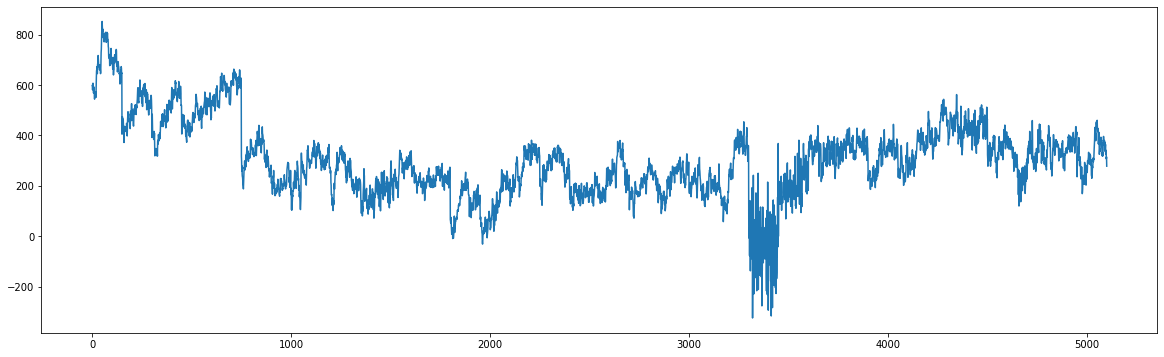

In [ ]:

fig = plt.figure(figsize=(20, 6))
plt.plot(C4_arrh)

<Figure size 1440x432 with 0 Axes>

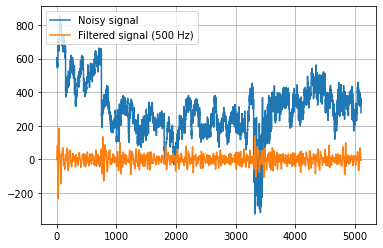

<Figure size 2880x720 with 0 Axes>

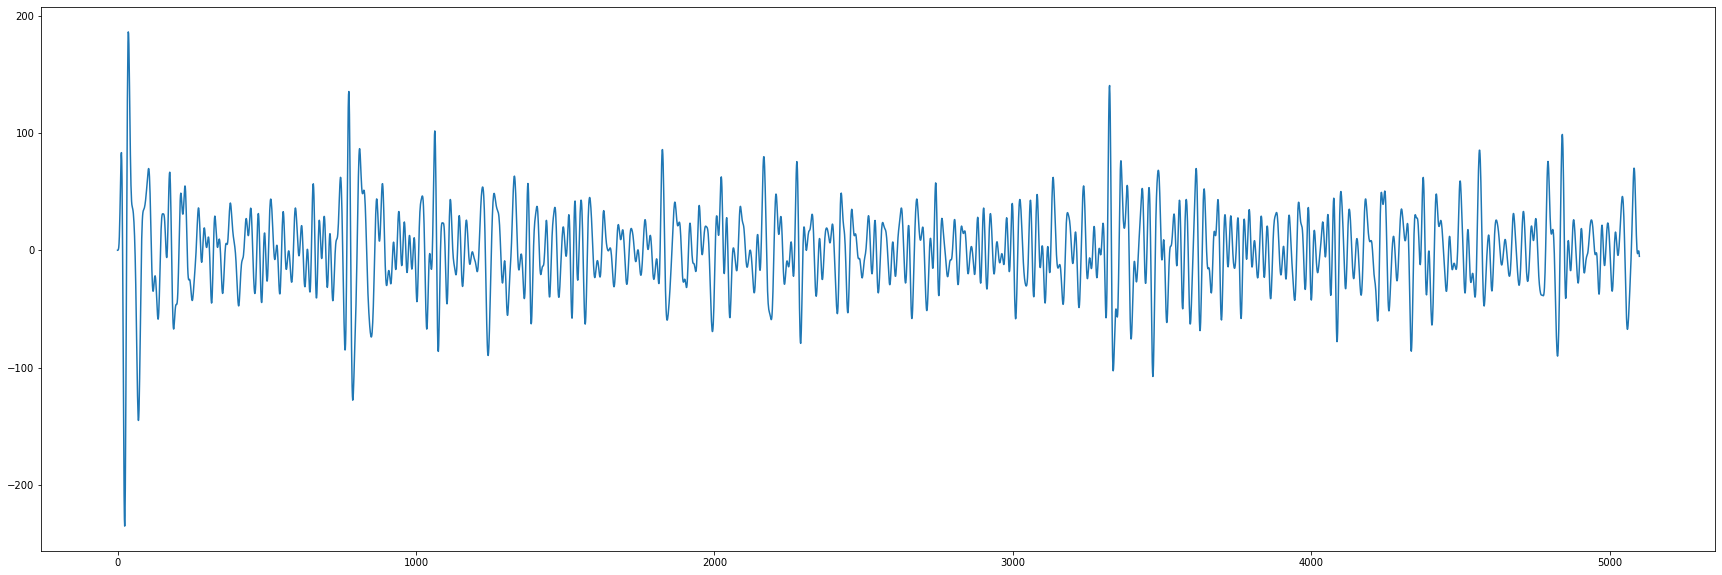

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( C4_arrh, label='Noisy signal')

y = butter_bandpass_filter(C4_arrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

#Notch Filter

<Figure size 576x432 with 0 Axes>

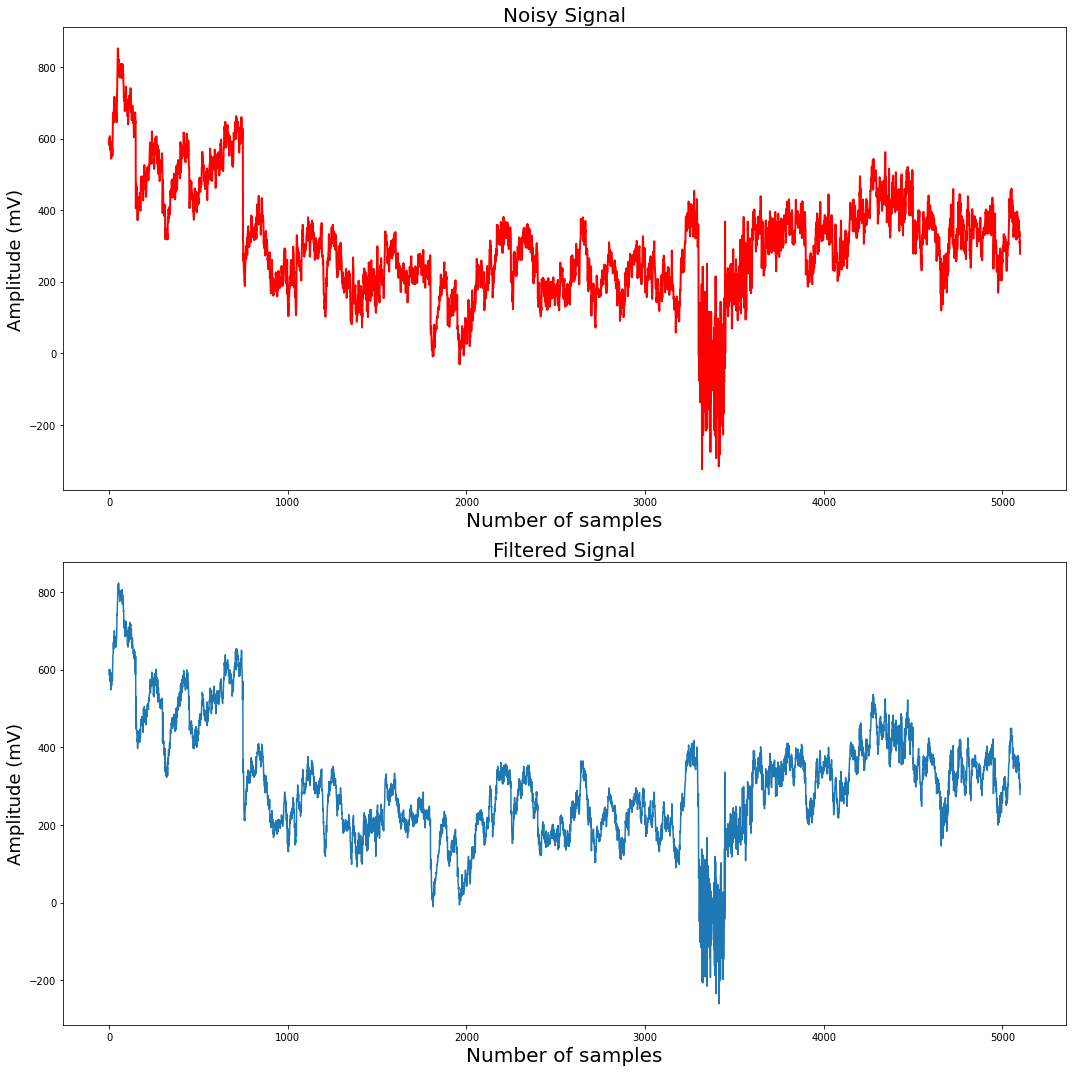

In [ ]:
# Create/view notch filter
samp_freq = 500  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 1.0  # Quality factor
  
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
  
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
  
fig = plt.figure(figsize=(8, 6))
  
# Set time vector
n = np.linspace(0, 1, 100)  # Generate 1000 sample sequence in 1 sec
   
# Plotting
fig = plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.plot( C4_arrh, color='r', linewidth=2)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.title('Noisy Signal', fontsize=20)
  
# Apply notch filter to the noisy signal using signal.filtfilt
output_C4arrh = signal.filtfilt(b_notch, a_notch, C4_arrh)
  
# Plot notch-filtered version of signal
plt.subplot(212)
  
# Plot output signal of notch filter
plt.plot(output_C4arrh)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

<Figure size 1440x432 with 0 Axes>

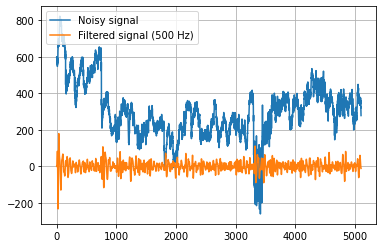

<Figure size 2880x720 with 0 Axes>

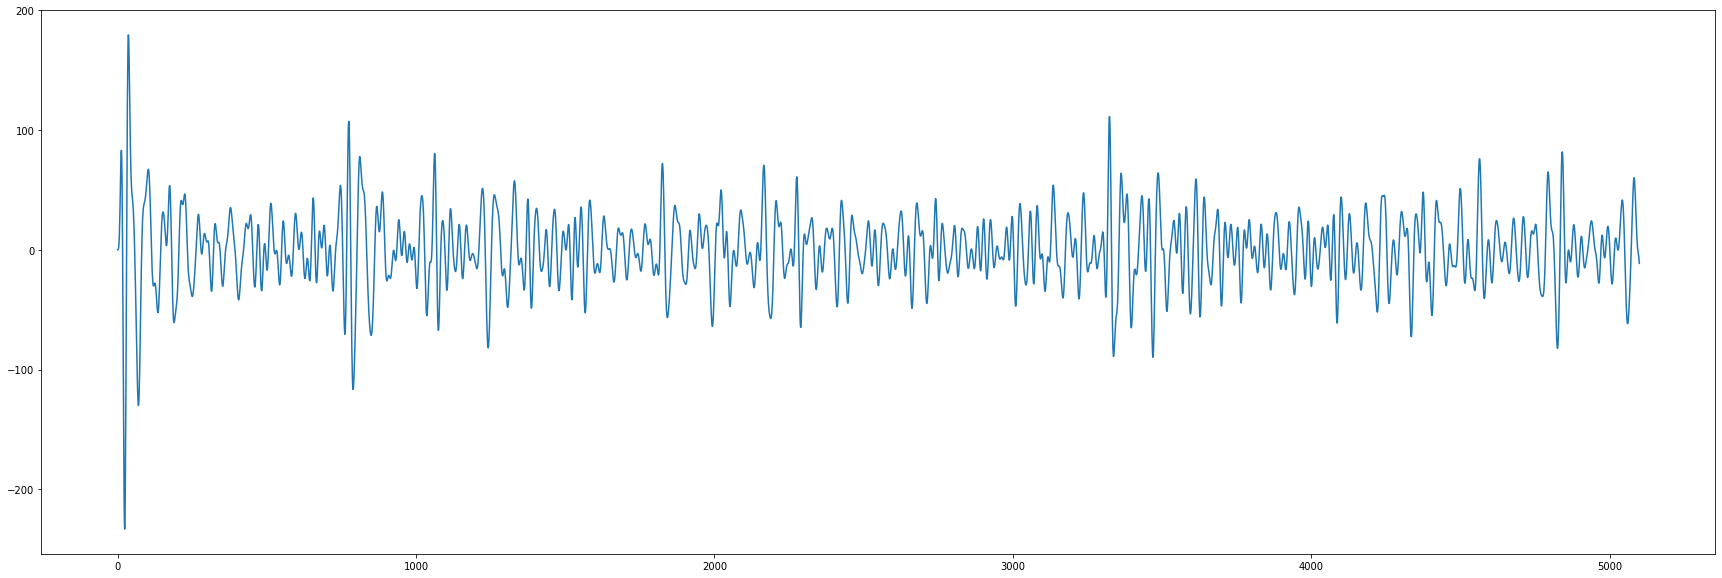

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( output_C4arrh, label='Noisy signal')

y = butter_bandpass_filter(output_C4arrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

### DWT

In [ ]:
import pywt
w = pywt.Wavelet('sym5')
coeffs = pywt.wavedec(C4_arrh, w, level=6)

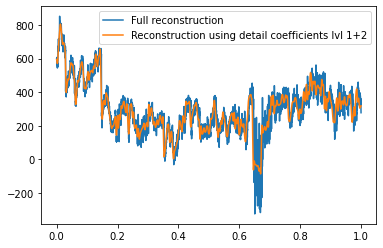

In [ ]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
#reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
#reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 1+2', 'Reconstruction using lvl 1 approximation only'])

## Cz

In [ ]:
Cz_arrh = []
for i in range(119495):
  if HS[i] == 1:
    Cz_arrh.append(Cz[i])
 
print(Cz_arrh)

[154, 137, 133, 140, 154, 158, 134, 158, 158, 149, 143, 157, 158, 169, 186, 188, 193, 175, 188, 183, 200, 194, 212, 212, 211, 230, 229, 230, 230, 230, 240, 230, 248, 240, 244, 250, 242, 213, 201, 237, 220, 237, 221, 206, 208, 212, 226, 234, 223, 255, 250, 241, 232, 251, 258, 253, 256, 261, 255, 275, 262, 262, 254, 257, 262, 233, 241, 270, 251, 234, 251, 253, 270, 289, 309, 281, 269, 258, 220, 205, 222, 232, 225, 219, 206, 203, 198, 210, 205, 190, 227, 234, 212, 222, 202, 205, 220, 183, 182, 185, 190, 188, 183, 199, 199, 189, 209, 160, 181, 194, 208, 206, 201, 208, 195, 177, 164, 177, 169, 188, 176, 193, 192, 173, 145, 161, 165, 149, 178, 191, 178, 207, 194, 191, 200, 186, 178, 192, 195, 182, 180, 200, 196, 198, 203, 226, 238, 221, 215, 191, 19, 43, 42, 59, 57, 53, 64, 44, 40, 20, 25, 29, 67, 57, 62, 47, 45, 25, 39, 49, 60, 69, 54, 61, 50, 22, 33, 53, 70, 76, 75, 44, 68, 55, 37, 57, 52, 53, 40, 23, 47, 53, 55, 75, 77, 66, 86, 86, 79, 77, 80, 71, 55, 69, 91, 110, 76, 75, 74, 54, 50, 60, 

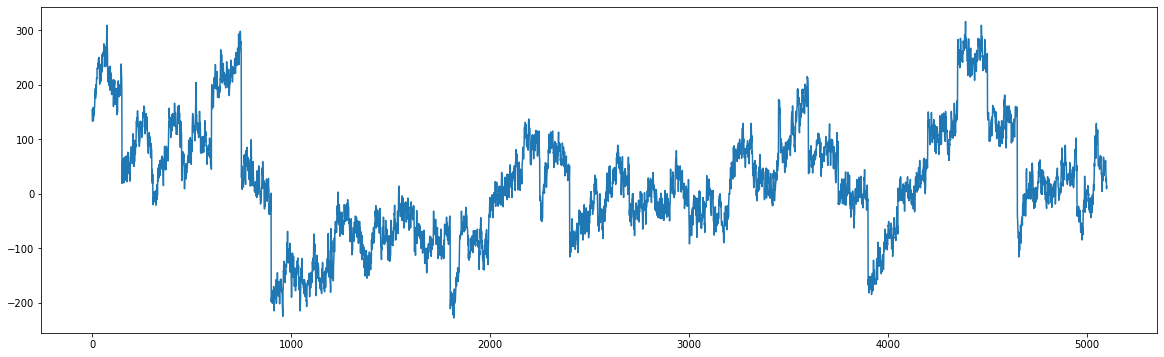

In [ ]:
fig = plt.figure(figsize=(20, 6))
plt.plot(Cz_arrh)

<Figure size 1440x432 with 0 Axes>

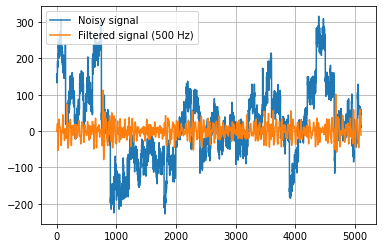

<Figure size 2880x720 with 0 Axes>

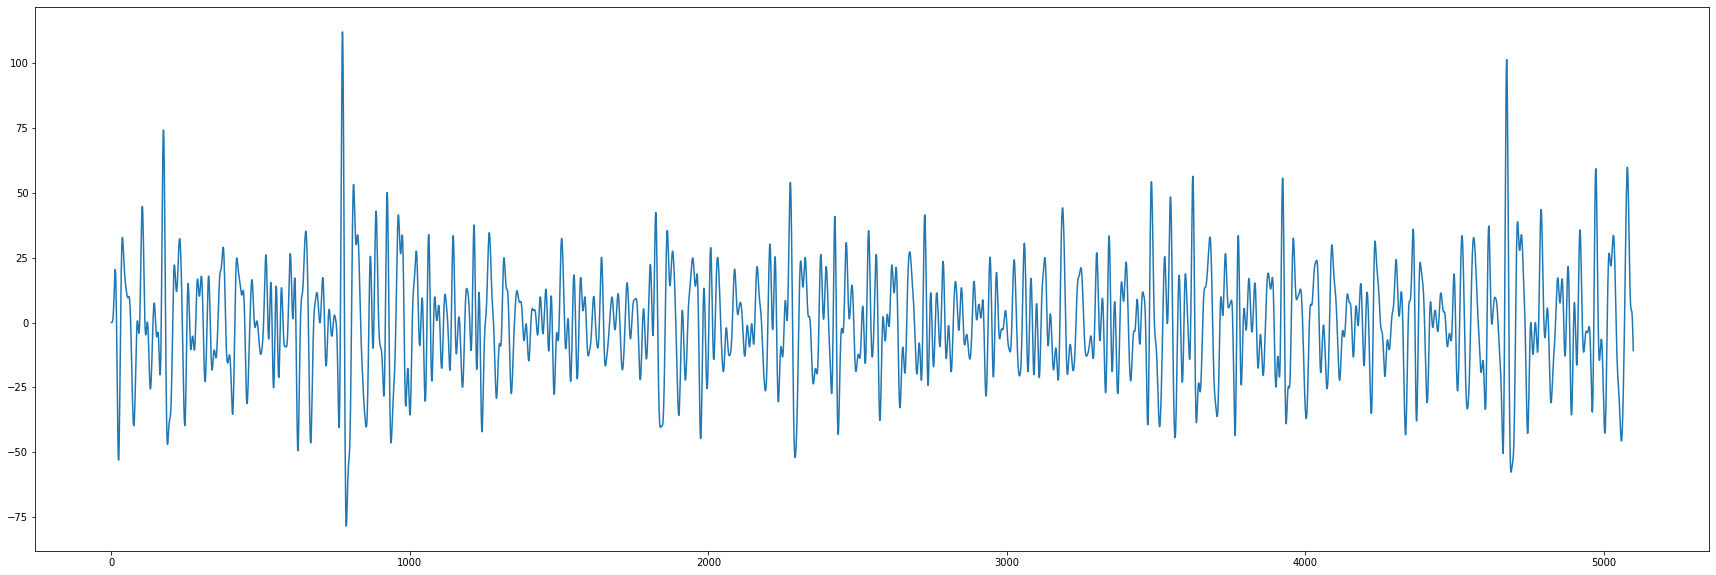

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Cz_arrh, label='Noisy signal')

y = butter_bandpass_filter(Cz_arrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

## Notch

<Figure size 576x432 with 0 Axes>

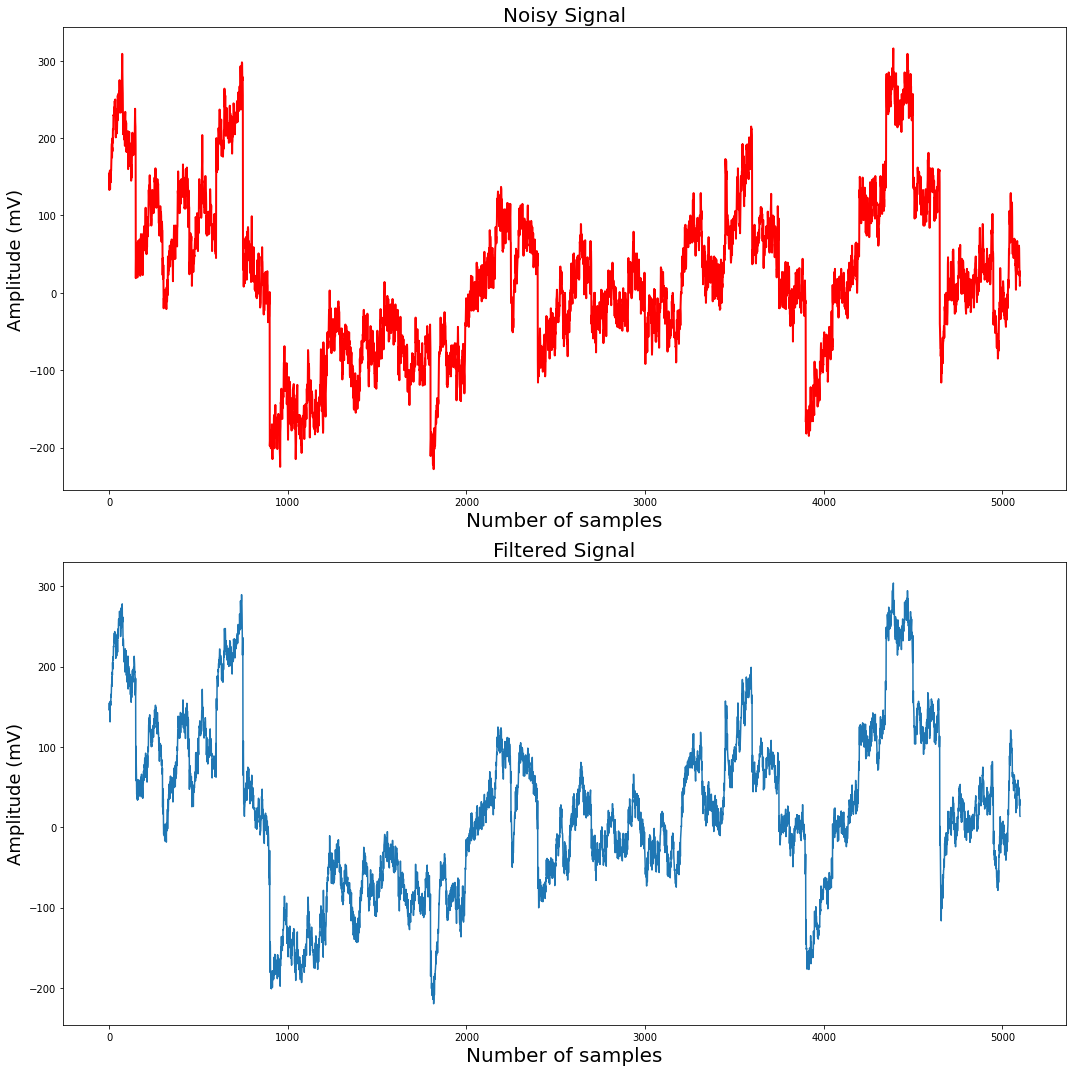

In [ ]:
# Create/view notch filter
samp_freq = 500  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 1.0  # Quality factor
  
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
  
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
  
fig = plt.figure(figsize=(8, 6))
  
# Set time vector
n = np.linspace(0, 1, 100)  # Generate 1000 sample sequence in 1 sec
   
# Plotting
fig = plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.plot( Cz_arrh, color='r', linewidth=2)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.title('Noisy Signal', fontsize=20)
  
# Apply notch filter to the noisy signal using signal.filtfilt
output_Czarrh = signal.filtfilt(b_notch, a_notch, Cz_arrh)
  
# Plot notch-filtered version of signal
plt.subplot(212)
  
# Plot output signal of notch filter
plt.plot(output_Czarrh)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

<Figure size 1440x432 with 0 Axes>

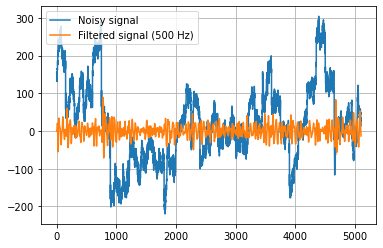

<Figure size 2880x720 with 0 Axes>

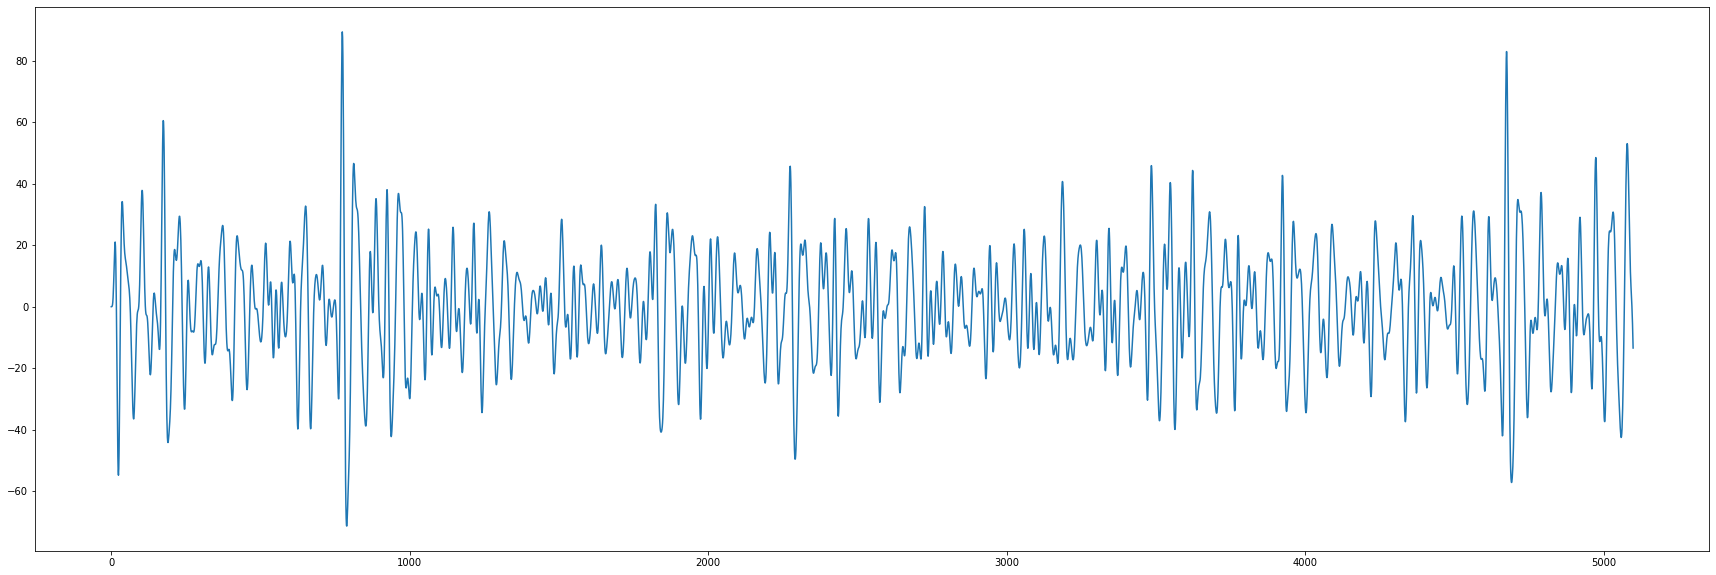

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( output_Czarrh, label='Noisy signal')

y = butter_bandpass_filter(output_Czarrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

## DWT

In [ ]:
import pywt
w = pywt.Wavelet('sym5')
coeffs = pywt.wavedec(Cz_arrh, w, level=6)

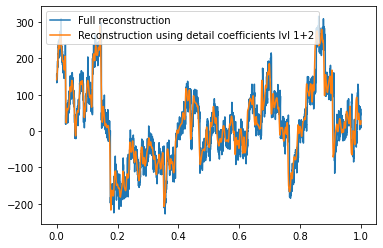

In [ ]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
#reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
#reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 1+2', 'Reconstruction using lvl 1 approximation only'])

## P3

In [ ]:
P3_arrh = []
for i in range(119495):
  if HS[i] == 1:
    P3_arrh.append(P3[i])
 
print(P3_arrh)

[225, 241, 252, 298, 295, 245, 266, 286, 325, 294, 277, 312, 324, 345, 354, 352, 340, 352, 369, 366, 373, 380, 400, 435, 459, 479, 482, 494, 497, 500, 504, 507, 502, 506, 526, 526, 521, 520, 512, 551, 549, 603, 596, 580, 601, 611, 643, 669, 710, 718, 708, 675, 642, 666, 673, 696, 729, 763, 745, 736, 709, 667, 660, 757, 757, 640, 676, 649, 650, 634, 642, 666, 688, 730, 741, 731, 737, 644, 620, 631, 635, 662, 660, 665, 617, 619, 621, 621, 611, 584, 608, 600, 582, 583, 564, 558, 561, 556, 551, 505, 525, 532, 515, 502, 499, 514, 498, 471, 505, 531, 588, 590, 597, 604, 584, 541, 536, 570, 539, 535, 553, 575, 581, 551, 537, 569, 561, 509, 547, 569, 523, 546, 558, 552, 532, 505, 509, 509, 496, 462, 460, 501, 466, 420, 483, 479, 475, 473, 451, 412, 268, 319, 330, 353, 338, 326, 344, 314, 279, 265, 251, 268, 307, 254, 275, 304, 319, 289, 292, 298, 291, 284, 275, 278, 264, 251, 248, 258, 264, 279, 305, 291, 315, 327, 332, 336, 347, 368, 300, 291, 308, 305, 320, 360, 389, 357, 358, 364, 367, 357,

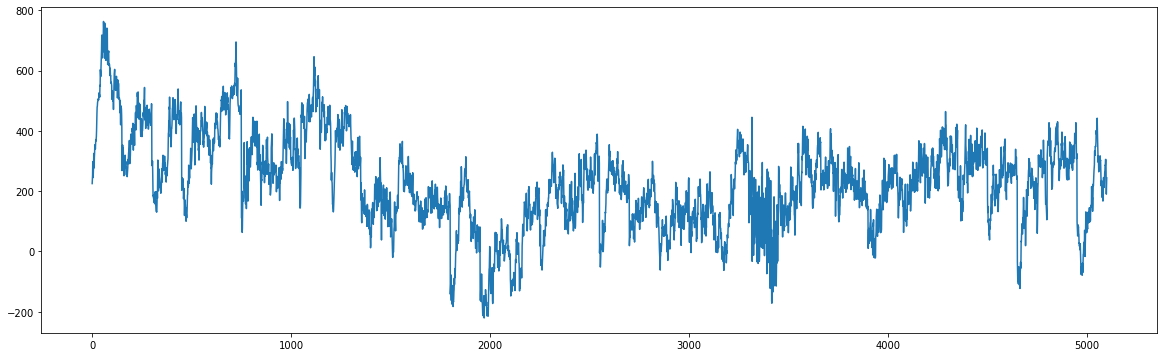

In [ ]:
fig = plt.figure(figsize=(20, 6))
plt.plot(P3_arrh)

<Figure size 1440x432 with 0 Axes>

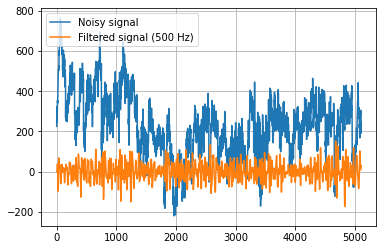

<Figure size 2880x720 with 0 Axes>

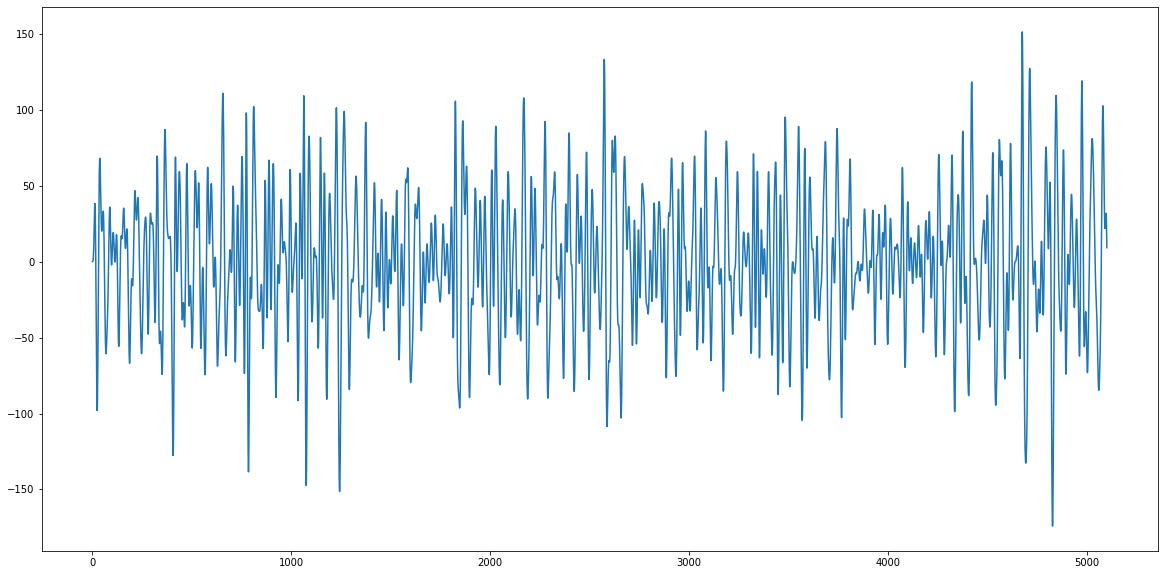

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P3_arrh, label='Noisy signal')

y = butter_bandpass_filter(P3_arrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

<Figure size 576x432 with 0 Axes>

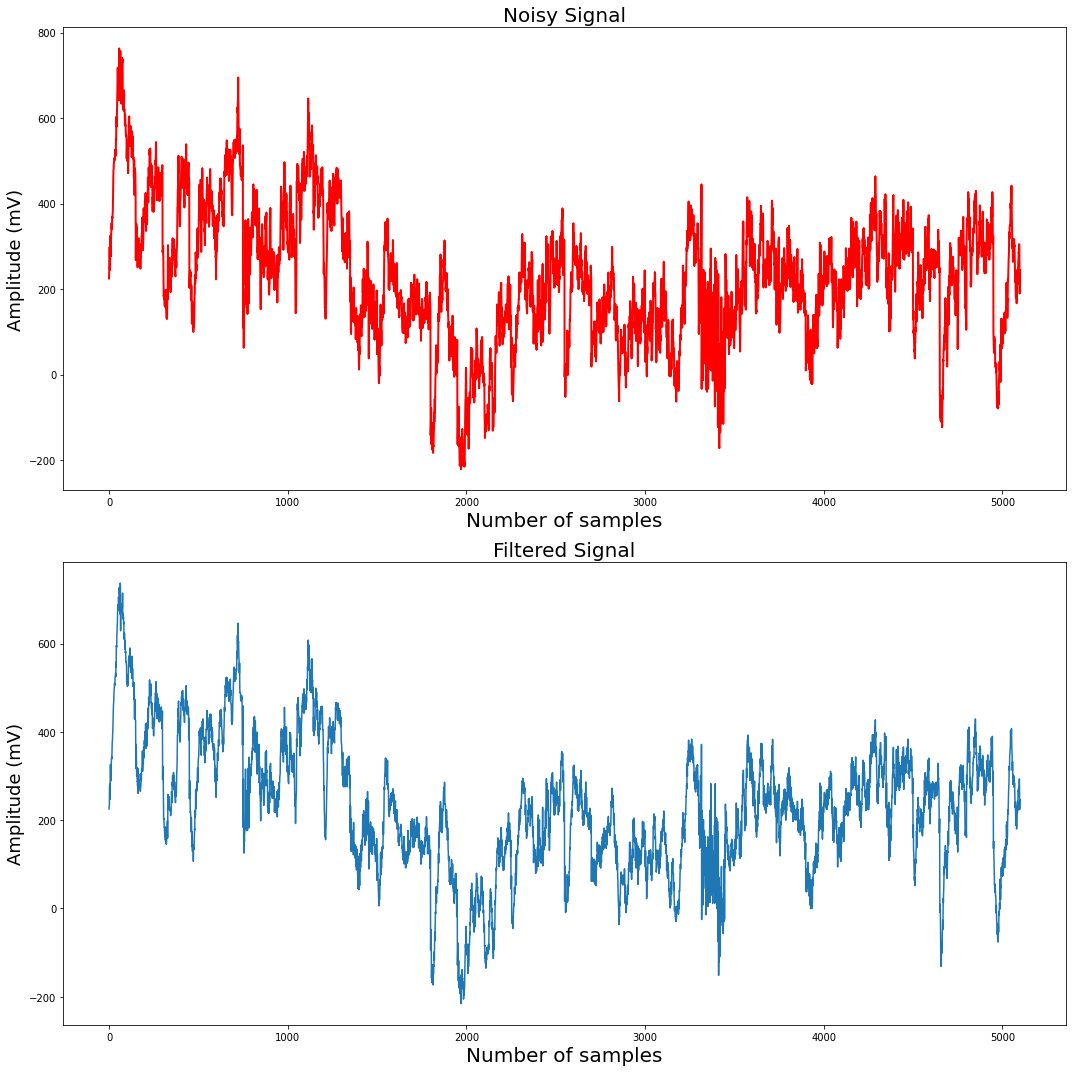

In [ ]:
# Create/view notch filter
samp_freq = 500  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 1.0  # Quality factor
  
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
  
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
  
fig = plt.figure(figsize=(8, 6))
  
# Set time vector
n = np.linspace(0, 1, 100)  # Generate 1000 sample sequence in 1 sec
   
# Plotting
fig = plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.plot( P3_arrh, color='r', linewidth=2)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.title('Noisy Signal', fontsize=20)
  
# Apply notch filter to the noisy signal using signal.filtfilt
output_P3arrh = signal.filtfilt(b_notch, a_notch, P3_arrh)
  
# Plot notch-filtered version of signal
plt.subplot(212)
  
# Plot output signal of notch filter
plt.plot(output_P3arrh)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

<Figure size 1440x432 with 0 Axes>

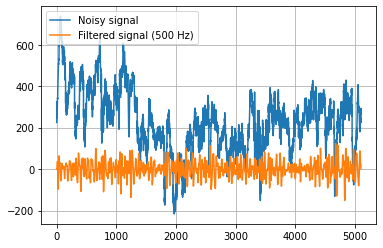

<Figure size 2880x720 with 0 Axes>

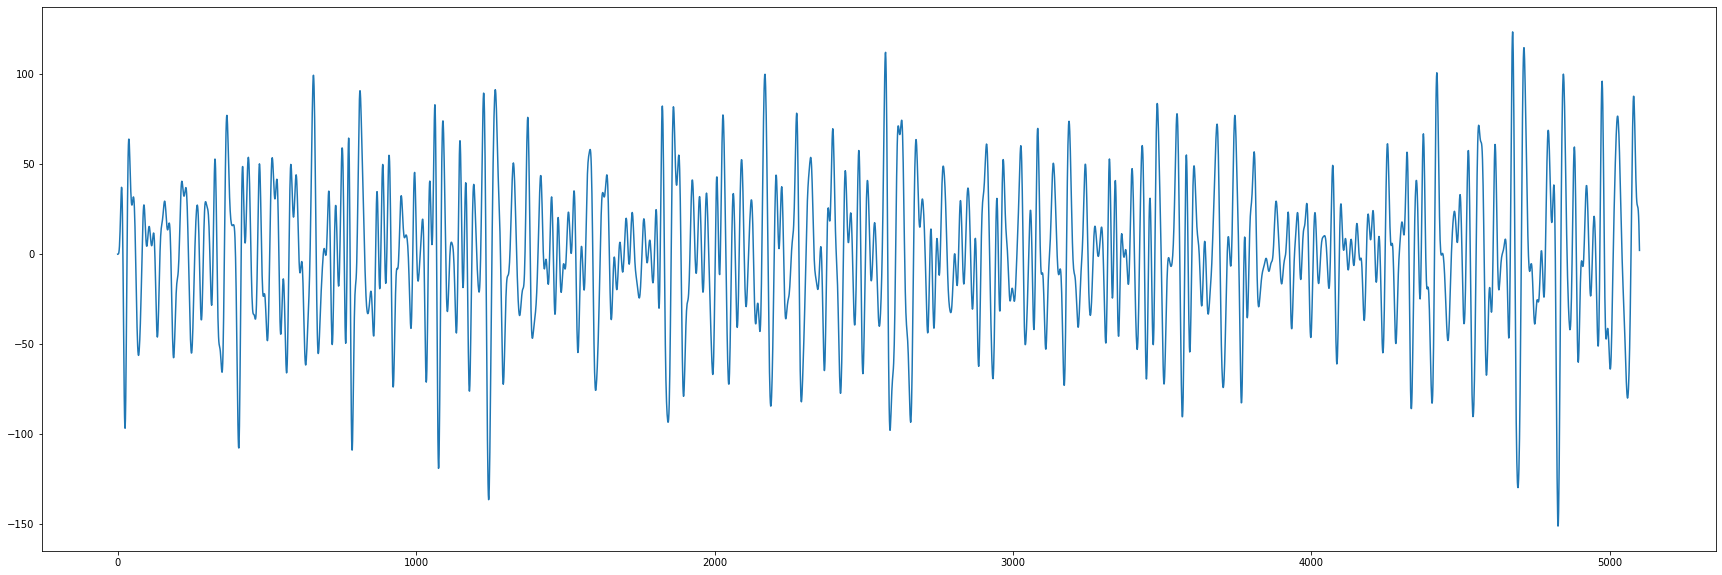

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( output_P3arrh, label='Noisy signal')

y = butter_bandpass_filter(output_P3arrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

## DWT

In [ ]:
w = pywt.Wavelet('sym5')
coeffs = pywt.wavedec(P3_arrh, w, level=6)

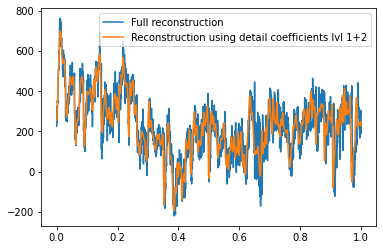

In [ ]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
#reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
#reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coefficients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 1+2', 'Reconstruction using lvl 1 approximation only'])

## P4

In [ ]:
P4_arrh = []
for i in range(119495):
  if HS[i] == 1:
    P4_arrh.append(P4[i])
 
print(P4_arrh)

[136, 135, 122, 108, 123, 132, 119, 124, 149, 144, 132, 145, 144, 198, 217, 223, 221, 210, 211, 199, 218, 244, 287, 278, 281, 306, 313, 353, 366, 372, 391, 373, 349, 351, 384, 362, 350, 354, 356, 374, 386, 402, 398, 400, 403, 446, 464, 519, 576, 604, 609, 564, 518, 533, 553, 561, 593, 628, 609, 602, 598, 587, 570, 592, 610, 590, 596, 592, 564, 531, 534, 523, 570, 614, 602, 564, 571, 525, 491, 491, 514, 524, 513, 495, 457, 450, 463, 478, 435, 418, 448, 459, 443, 437, 437, 440, 462, 456, 426, 410, 419, 441, 468, 423, 399, 429, 409, 359, 376, 372, 451, 457, 429, 460, 425, 413, 430, 444, 443, 444, 437, 459, 495, 425, 357, 401, 409, 376, 412, 408, 369, 402, 397, 364, 341, 373, 356, 335, 345, 324, 311, 299, 274, 257, 294, 348, 380, 362, 335, 289, 258, 325, 380, 377, 338, 353, 341, 286, 287, 282, 285, 277, 322, 301, 321, 354, 353, 322, 338, 349, 351, 357, 334, 343, 320, 294, 272, 321, 357, 365, 397, 358, 393, 401, 374, 386, 397, 410, 373, 368, 361, 361, 394, 430, 436, 411, 424, 450, 475, 444,

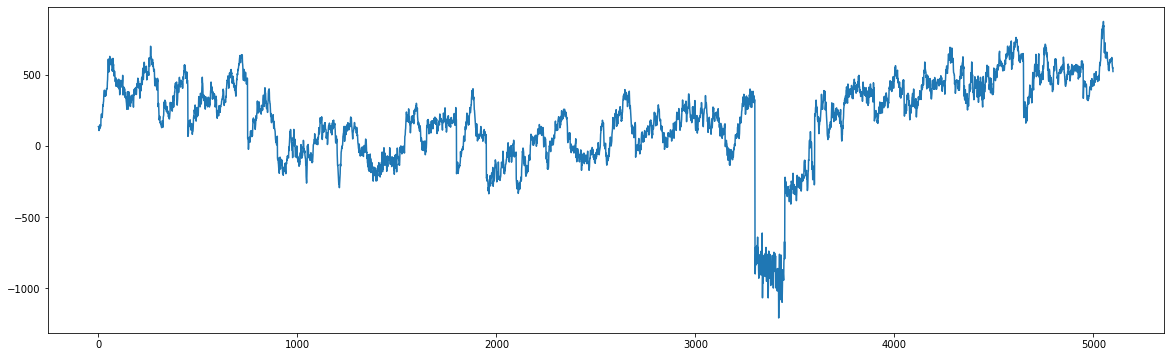

In [ ]:
fig = plt.figure(figsize=(20, 6))
plt.plot(P4_arrh)

<Figure size 1440x432 with 0 Axes>

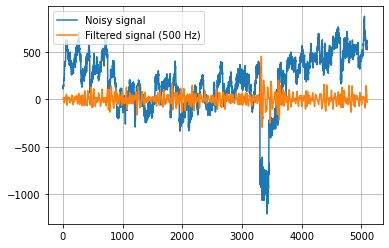

<Figure size 2880x720 with 0 Axes>

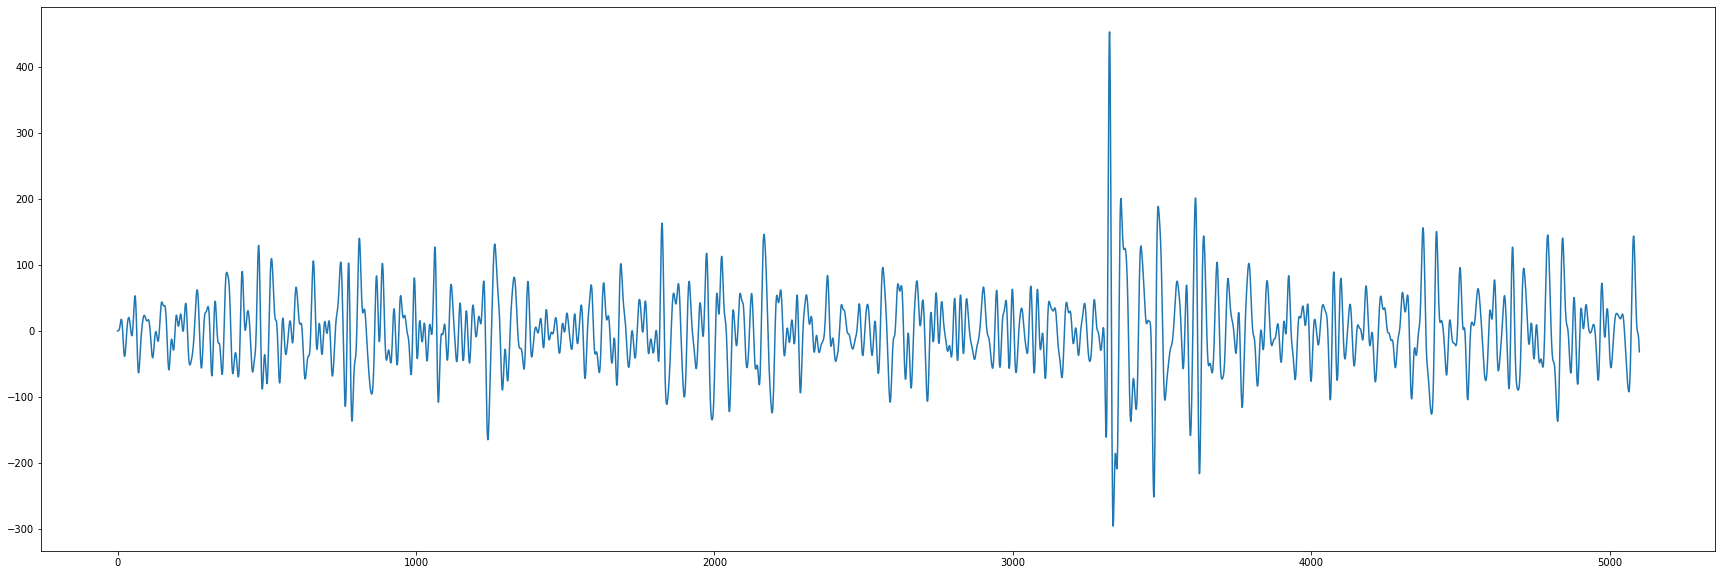

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( P4_arrh, label='Noisy signal')

y = butter_bandpass_filter(P4_arrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

<Figure size 576x432 with 0 Axes>

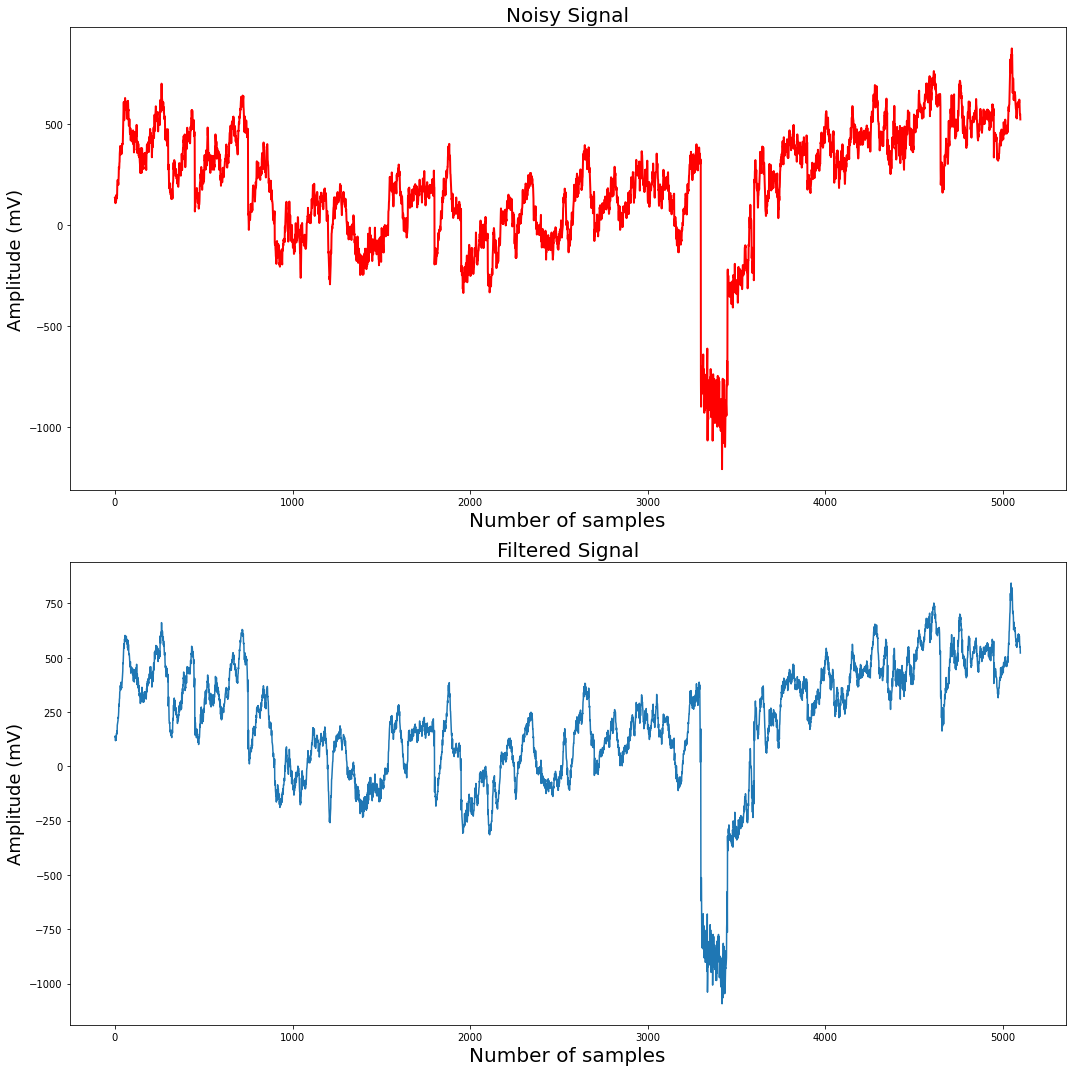

In [ ]:
# Create/view notch filter
samp_freq = 500  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 1.0  # Quality factor
  
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
  
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
  
fig = plt.figure(figsize=(8, 6))
  
# Set time vector
n = np.linspace(0, 1, 100)  # Generate 1000 sample sequence in 1 sec
   
# Plotting
fig = plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.plot( P4_arrh, color='r', linewidth=2)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.title('Noisy Signal', fontsize=20)
  
# Apply notch filter to the noisy signal using signal.filtfilt
output_P4arrh = signal.filtfilt(b_notch, a_notch, P4_arrh)
  
# Plot notch-filtered version of signal
plt.subplot(212)
  
# Plot output signal of notch filter
plt.plot(output_P4arrh)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

<Figure size 1440x432 with 0 Axes>

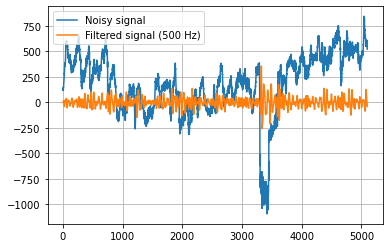

<Figure size 2880x720 with 0 Axes>

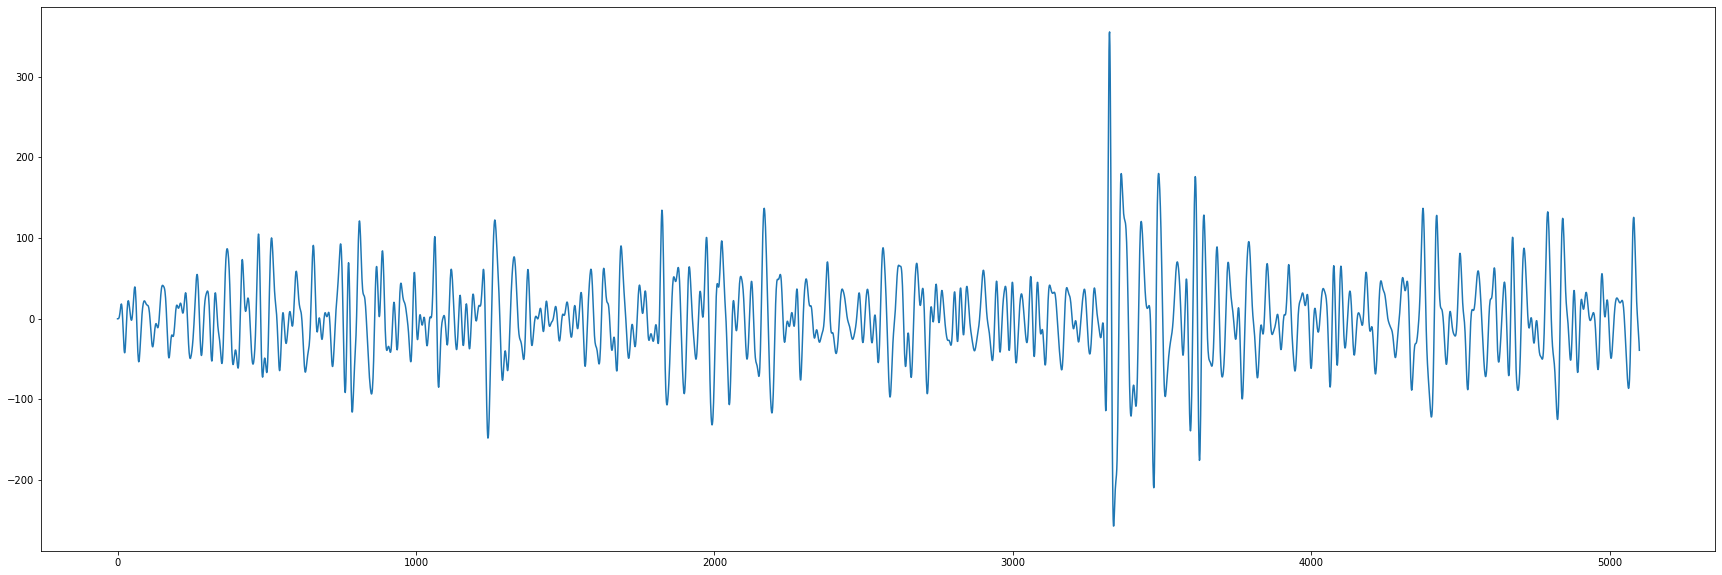

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( output_P4arrh, label='Noisy signal')

y = butter_bandpass_filter(output_P4arrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

## DWT

In [ ]:

w = pywt.Wavelet('sym5')
coeffs = pywt.wavedec(P4_arrh, w, level=6)

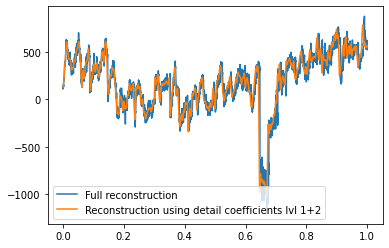

In [ ]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
#reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
#reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coeffiients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 1+2', 'Reconstruction using lvl 1 approximation only'])

## Pz

In [ ]:
Pz_arrh = []
for i in range(119495):
  if HS[i] == 1:
    Pz_arrh.append(Pz[i])
 
print(Pz_arrh)

[336, 325, 318, 311, 339, 347, 330, 356, 363, 328, 322, 363, 384, 414, 433, 422, 417, 425, 435, 429, 458, 464, 482, 476, 480, 516, 528, 532, 523, 529, 549, 550, 549, 535, 547, 552, 544, 531, 525, 538, 533, 570, 557, 543, 548, 568, 617, 650, 659, 672, 681, 643, 619, 632, 648, 663, 677, 708, 695, 700, 701, 687, 694, 709, 717, 673, 658, 676, 650, 622, 649, 664, 688, 726, 729, 699, 699, 648, 609, 600, 611, 624, 623, 601, 563, 564, 560, 583, 562, 555, 592, 572, 556, 560, 547, 561, 572, 540, 527, 494, 515, 512, 518, 504, 488, 496, 500, 465, 474, 492, 559, 558, 543, 554, 526, 522, 519, 538, 517, 518, 525, 541, 529, 506, 508, 506, 485, 467, 503, 523, 504, 510, 490, 472, 469, 468, 455, 469, 459, 424, 402, 413, 391, 393, 420, 454, 471, 445, 418, 395, 169, 216, 236, 263, 241, 237, 251, 201, 191, 179, 183, 210, 215, 182, 209, 232, 233, 209, 221, 233, 228, 221, 211, 211, 193, 162, 156, 197, 218, 228, 250, 226, 240, 243, 243, 273, 289, 296, 254, 238, 232, 239, 271, 295, 310, 293, 314, 328, 316, 329,

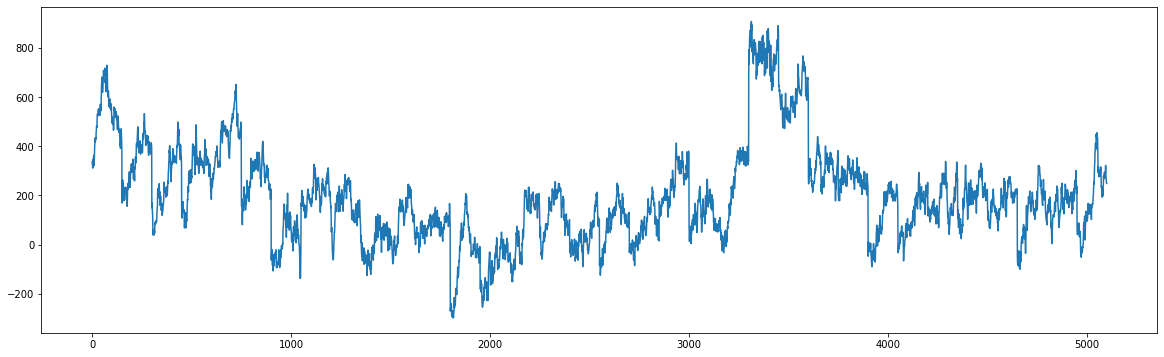

In [ ]:
fig = plt.figure(figsize=(20, 6))
plt.plot(Pz_arrh)

<Figure size 1440x432 with 0 Axes>

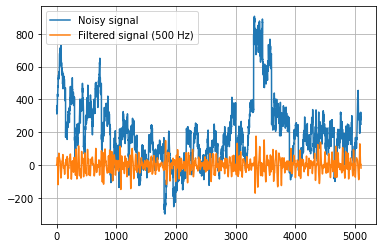

<Figure size 2880x720 with 0 Axes>

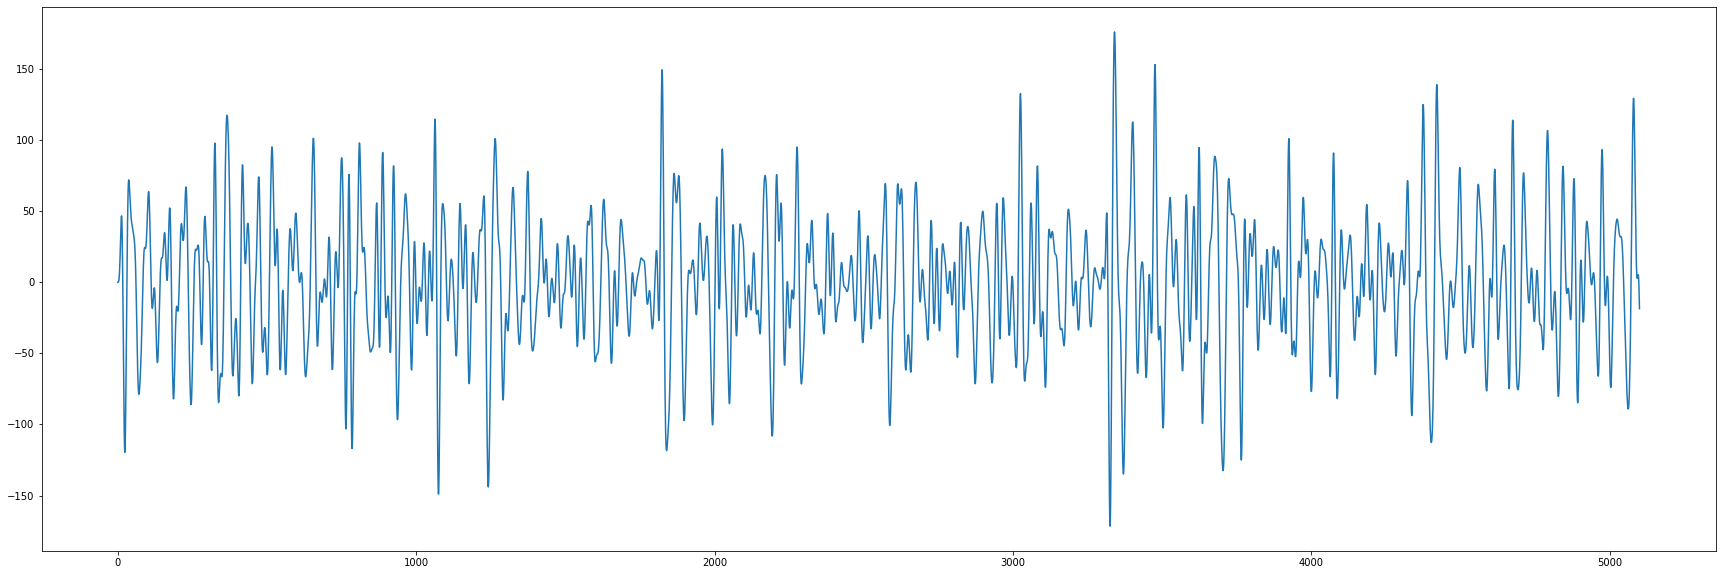

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( Pz_arrh, label='Noisy signal')

y = butter_bandpass_filter(Pz_arrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

<Figure size 576x432 with 0 Axes>

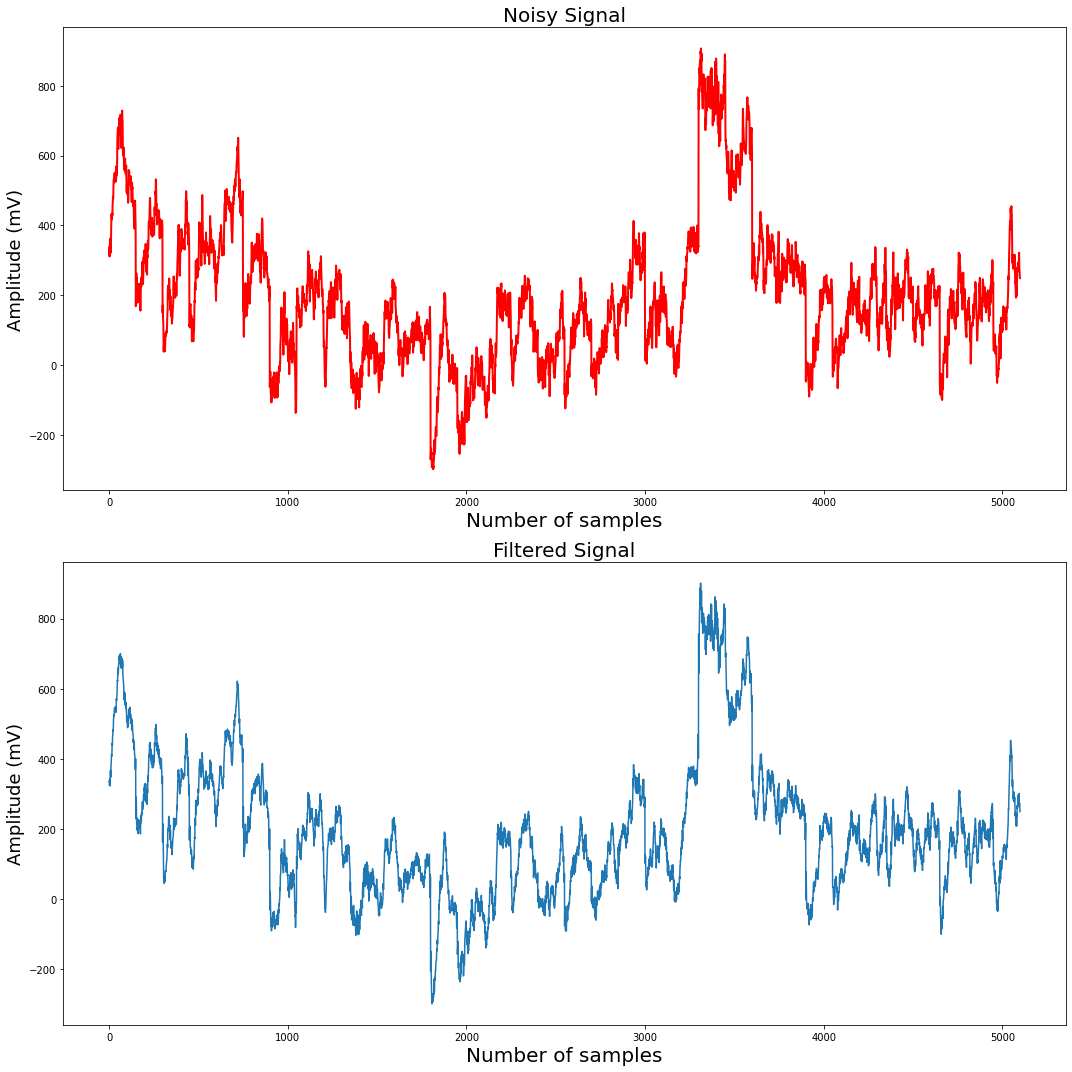

In [ ]:
# Create/view notch filter
samp_freq = 500  # Sample frequency (Hz)
notch_freq = 50.0  # Frequency to be removed from signal (Hz)
quality_factor = 1.0  # Quality factor
  
# Design a notch filter using signal.iirnotch
b_notch, a_notch = signal.iirnotch(notch_freq, quality_factor, samp_freq)
  
# Compute magnitude response of the designed filter
freq, h = signal.freqz(b_notch, a_notch, fs=samp_freq)
  
fig = plt.figure(figsize=(8, 6))
  
# Set time vector
n = np.linspace(0, 1, 100)  # Generate 1000 sample sequence in 1 sec
   
# Plotting
fig = plt.figure(figsize=(15, 15))
plt.subplot(211)
plt.plot( Pz_arrh, color='r', linewidth=2)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.title('Noisy Signal', fontsize=20)
  
# Apply notch filter to the noisy signal using signal.filtfilt
output_Pzarrh = signal.filtfilt(b_notch, a_notch, Pz_arrh)
  
# Plot notch-filtered version of signal
plt.subplot(212)
  
# Plot output signal of notch filter
plt.plot(output_Pzarrh)
plt.xlabel('Number of samples', fontsize=20)
plt.ylabel('Amplitude (mV)', fontsize=18)
plt.title('Filtered Signal', fontsize=20)
plt.subplots_adjust(hspace=0.5)
fig.tight_layout()
plt.show()

<Figure size 1440x432 with 0 Axes>

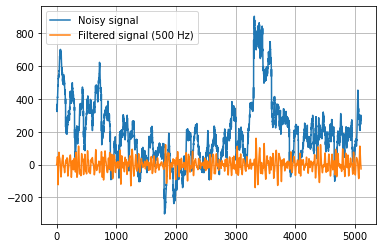

<Figure size 2880x720 with 0 Axes>

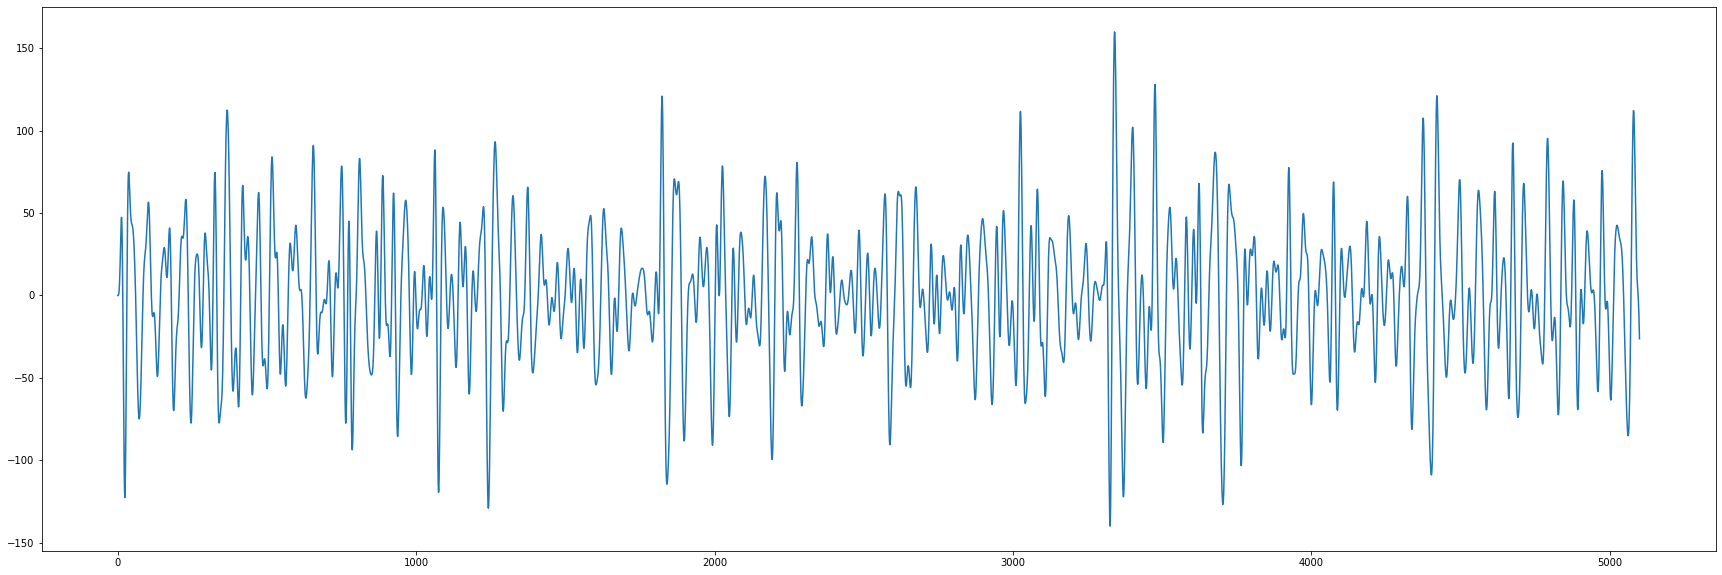

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 500
lowcut = 7
highcut = 30

# Filter a noisy signal.
#nsamples = int(T * fs)
f0 = 500.0
figure = plt.figure(figsize=(20, 6))
plt.figure(2)
plt.clf()
plt.plot( output_Pzarrh, label='Noisy signal')

y = butter_bandpass_filter(output_Pzarrh, lowcut, highcut, fs, order=6)

plt.plot( y, label='Filtered signal (%g Hz)' % f0)
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.figure(figsize=(40, 10))
plt.show()

#resizing
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)
plt.plot(y, label='Filtered signal (%g Hz)' % f0)
plt.show()

## DWT

In [ ]:
w = pywt.Wavelet('sym5')
coeffs = pywt.wavedec(Pz_arrh, w, level=6)

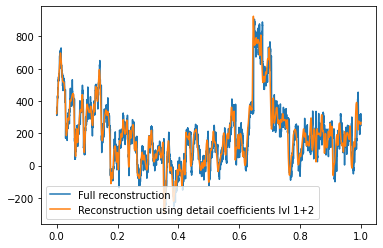

In [ ]:
def reconstruction_plot(yyy, **kwargs):
    """Plot signal vector on x [0,1] independently of amount of values it contains."""
    plt.plot(np.linspace(0, 1, len(yyy)), yyy, **kwargs)

reconstruction_plot(pywt.waverec(coeffs, w)) # full reconstruction 
#reconstruction_plot(pywt.waverec(coeffs[:-1] + [None] * 1, w)) # leaving out detail coefficients up to lvl 5
#reconstruction_plot(pywt.waverec(coeffs[:-2] + [None] * 2, w)) # leaving out detail coefficients up to lvl 4
#reconstruction_plot(pywt.waverec(coeffs[:-3] + [None] * 3, w)) # leaving out detail coefficients up to lvl 3
reconstruction_plot(pywt.waverec(coeffs[:-4] + [None] * 4, w)) # leaving out detail coeffiients up to lvl 2
#reconstruction_plot(pywt.waverec(coeffs[:-5] + [None] * 5, w)) # leaving out detail coefficients up to lvl 1
#reconstruction_plot(pywt.waverec(coeffs[:-6] + [None] * 6, w)) # leaving out all detail coefficients = reconstruction using lvl1 approximation only
plt.legend(['Full reconstruction', 'Reconstruction using detail coefficients lvl 1+2', 'Reconstruction using lvl 1 approximation only'])